# External modules

In [6]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [7]:

path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/predict_gev_mixture_model_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_gev_mixture_model_cdf.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_cdf.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_mixture_model_sample.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [8]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [9]:
data <- xfun::in_dir(dir = path, expr = read_csv("./applications/final_dataset.csv"))

Rows: 22847 Columns: 59
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
str(data)

spc_tbl_ [22,847 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude              : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num [1:22847] NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num [1:22847] NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num [1:22847] NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num [1:22847] 4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num [1:22847] -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num [1:2284

# Impute outliers

In [11]:
x_raw <- data$lateral_error_abs

In [14]:
names(data)

[1] "timestamp"              "latitude"               "longitude"             
 [4] "velocity_latitude"      "velocity_longitude"     "velocity"              
 [7] "lateral_error"          "longitudinal_error"     "haversine_error"       
[10] "latitude_error"         "longitude_error"        "heading_error"         
[13] "lateral_error_abs"      "longitudinal_error_abs" "haversine_error_abs"   
[16] "latitude_error_abs"     "longitude_error_abs"    "heading_error_abs"     
[19] "area"                   "object"                 "name_airplane"         
[22] "name_bench"             "name_bench..group."     "name_bicycle"          
[25] "name_bird"              "name_bird..group."      "name_boat"             
[28] "name_bus"               "name_car"               "name_car..group."      
[31] "name_dog"               "name_electric.pole"     "name_fence"            
[34] "name_fire.hydrant"      "name_gas.station"       "name_helicopter"       
[37] "name_house"             "name_house..group."     "name_motorcycle"       
[40] "name_parking.meter"     "name_person"            "name_person..group."   
[43] "name_scooter"           "name_special.building"  "name_stop.sign"        
[46] "name_street.light"      "name_tenement"          "name_traffic.light"    
[49] "name_traffic.sign"      "name_train"             "name_tree"             
[52] "name_tree..group."      "name_truck"             "name_tunnel"           
[55] "name_tunnel.entrance"   "horizontal_left"        "horizontal_right"      
[58] "vertical_down"          "vertical_up"

In [12]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [13]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [14]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [15]:
outlier_positions <- x_raw_object$outlier_positions

In [16]:
print(outlier_positions)

  [1]  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354
 [13]  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366
 [25]  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378
 [37]  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390
 [49]  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402
 [61]  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414
 [73]  2415  2416  2417  2418  4811  4812  4813  4814  4815  4816  4817  4818
 [85]  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830
 [97]  4831  4832  4833  4834 13507 16572 16573 16574 16575 16576 16577 16578
[109] 16579 16580 16599 16600 16601 16602 16603 16604 16605 16606 16607 16608
[121] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
[133] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
[145] 16633 16634 16635 16636 16637 16638 16639 16640 16641 1664

In [17]:
hist(outlier_positions, nclass = 50)

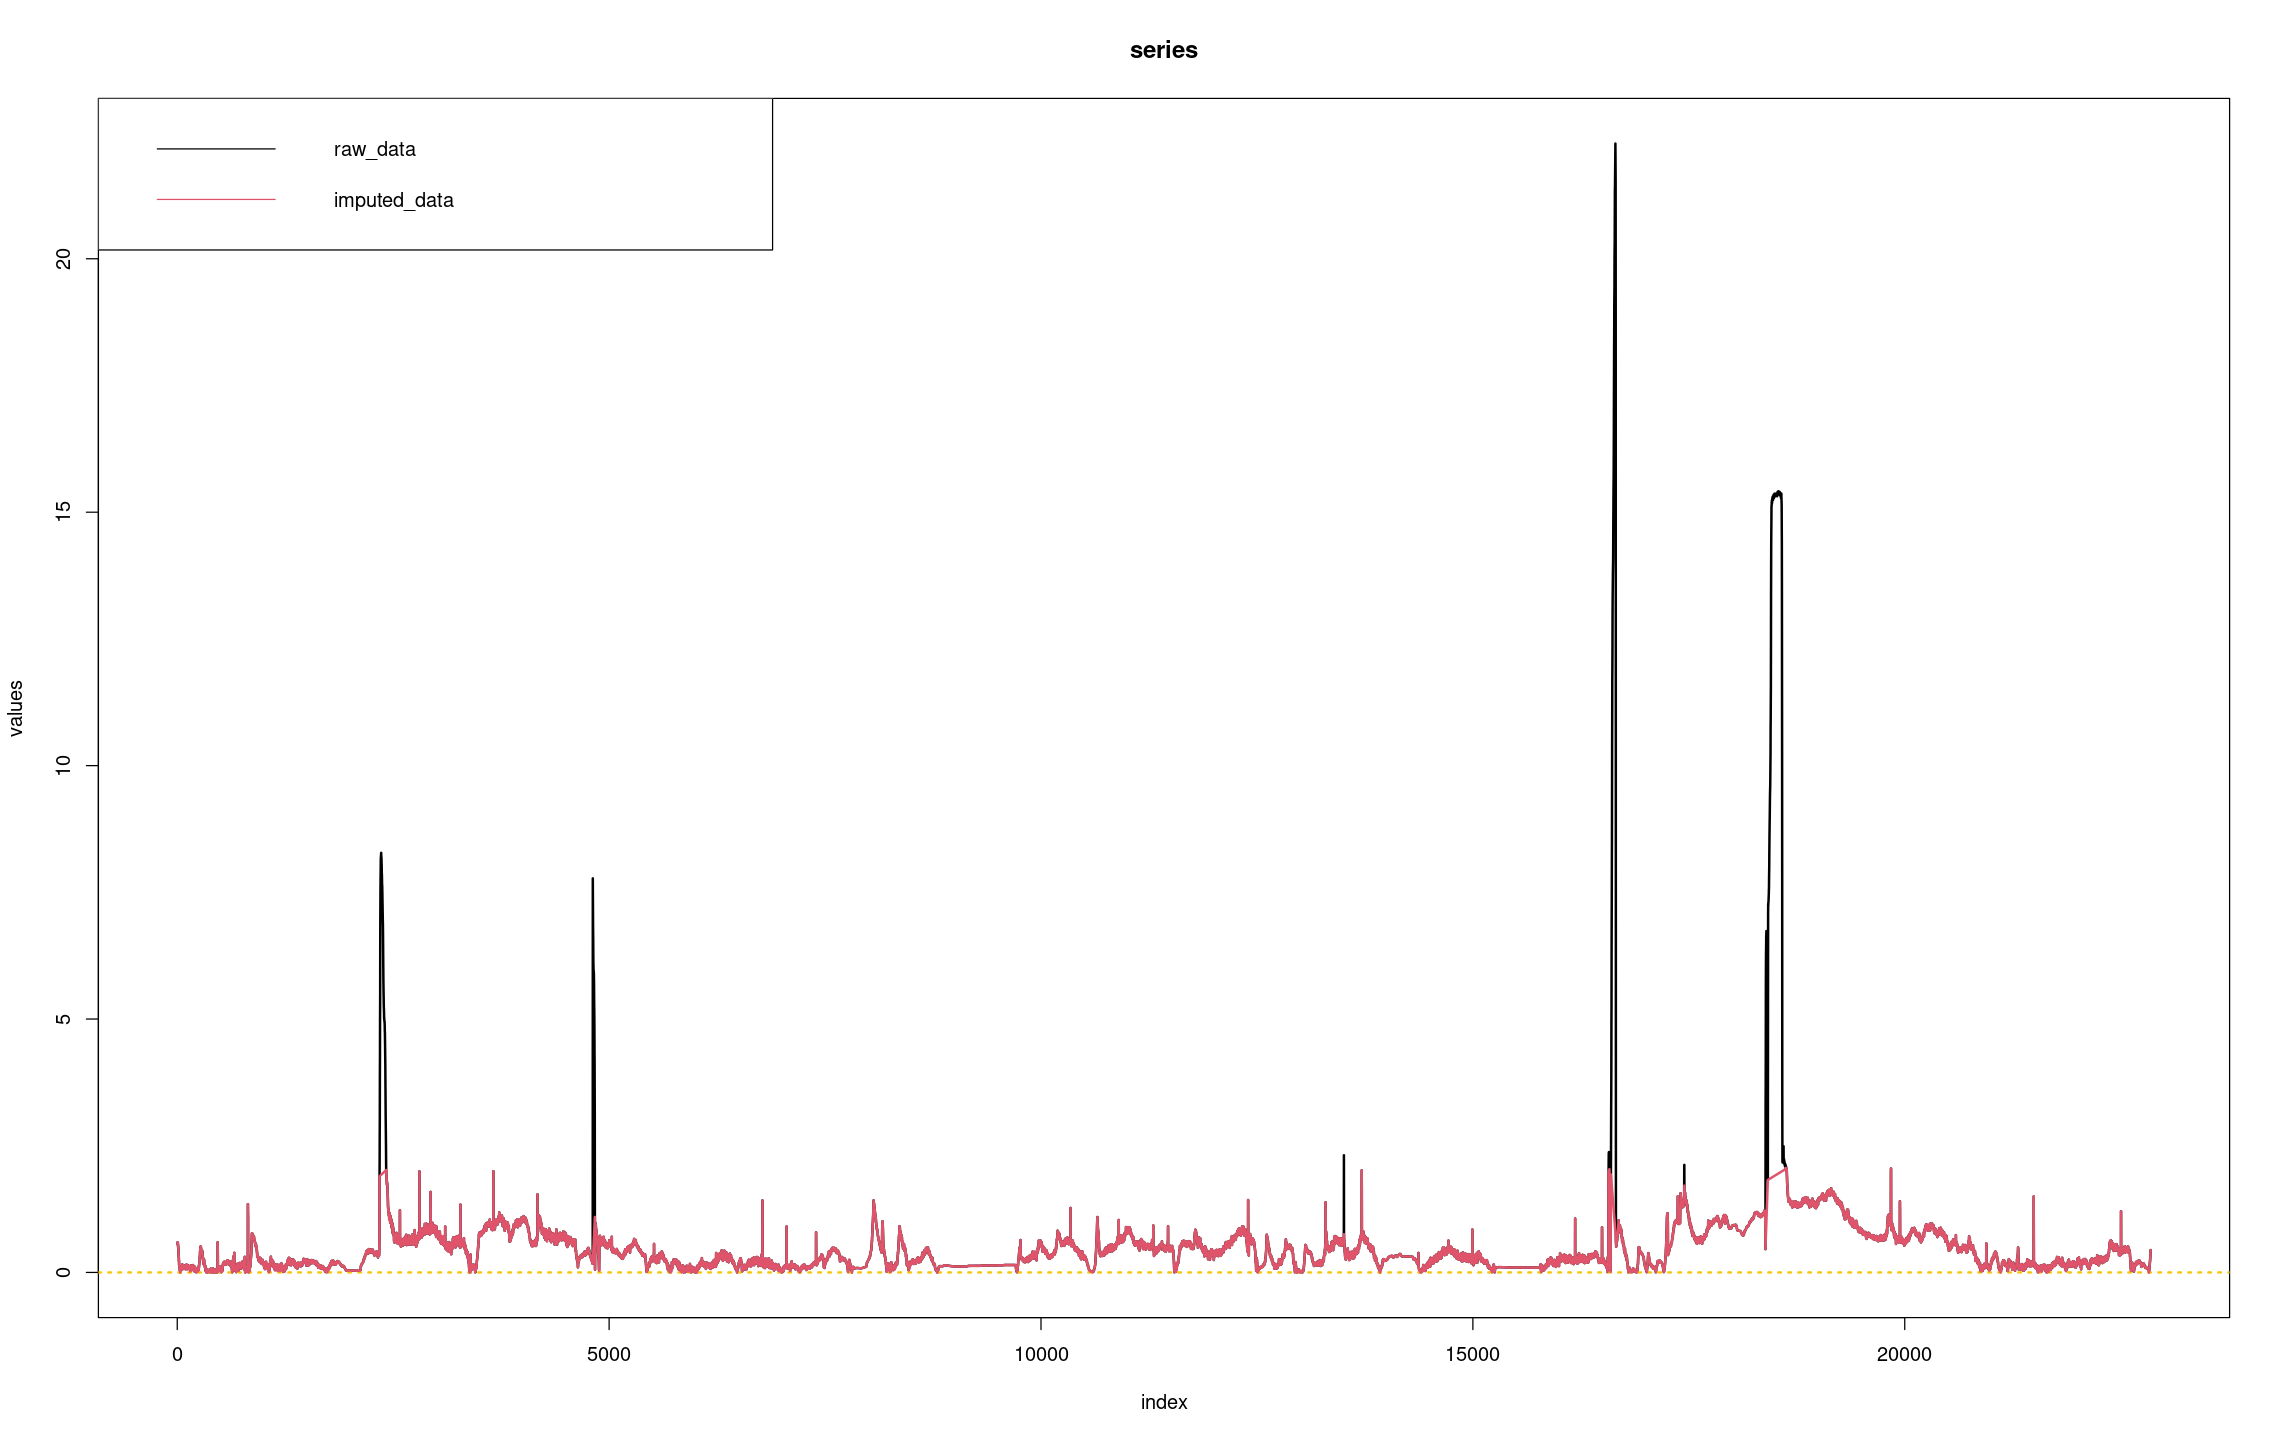

In [18]:
plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [19]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 

In [20]:
# data with removed outliers
x_with_removed_outliers <- x_raw[-outlier_positions]
data_clean <- data[-outlier_positions, ]

# Data description

In [21]:
x <- x_with_imputed_outliers
#x <- x_with_removed_outliers

In [22]:
Desc(x)

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'847           22'847                0           22'581
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481907140464  0.0872328415513  0.1457234174015  0.3253491818900
                                                                    
            range               sd            vcoef              mad
  2.0623233317050  0.3861824620114  0.8709736313693  0.3090927911670
                                                                    
               0s             mean           meanCI
                0  0.4433916804167  0.4383838564266
             0.0%                   0.4483995044067
                                                   
        

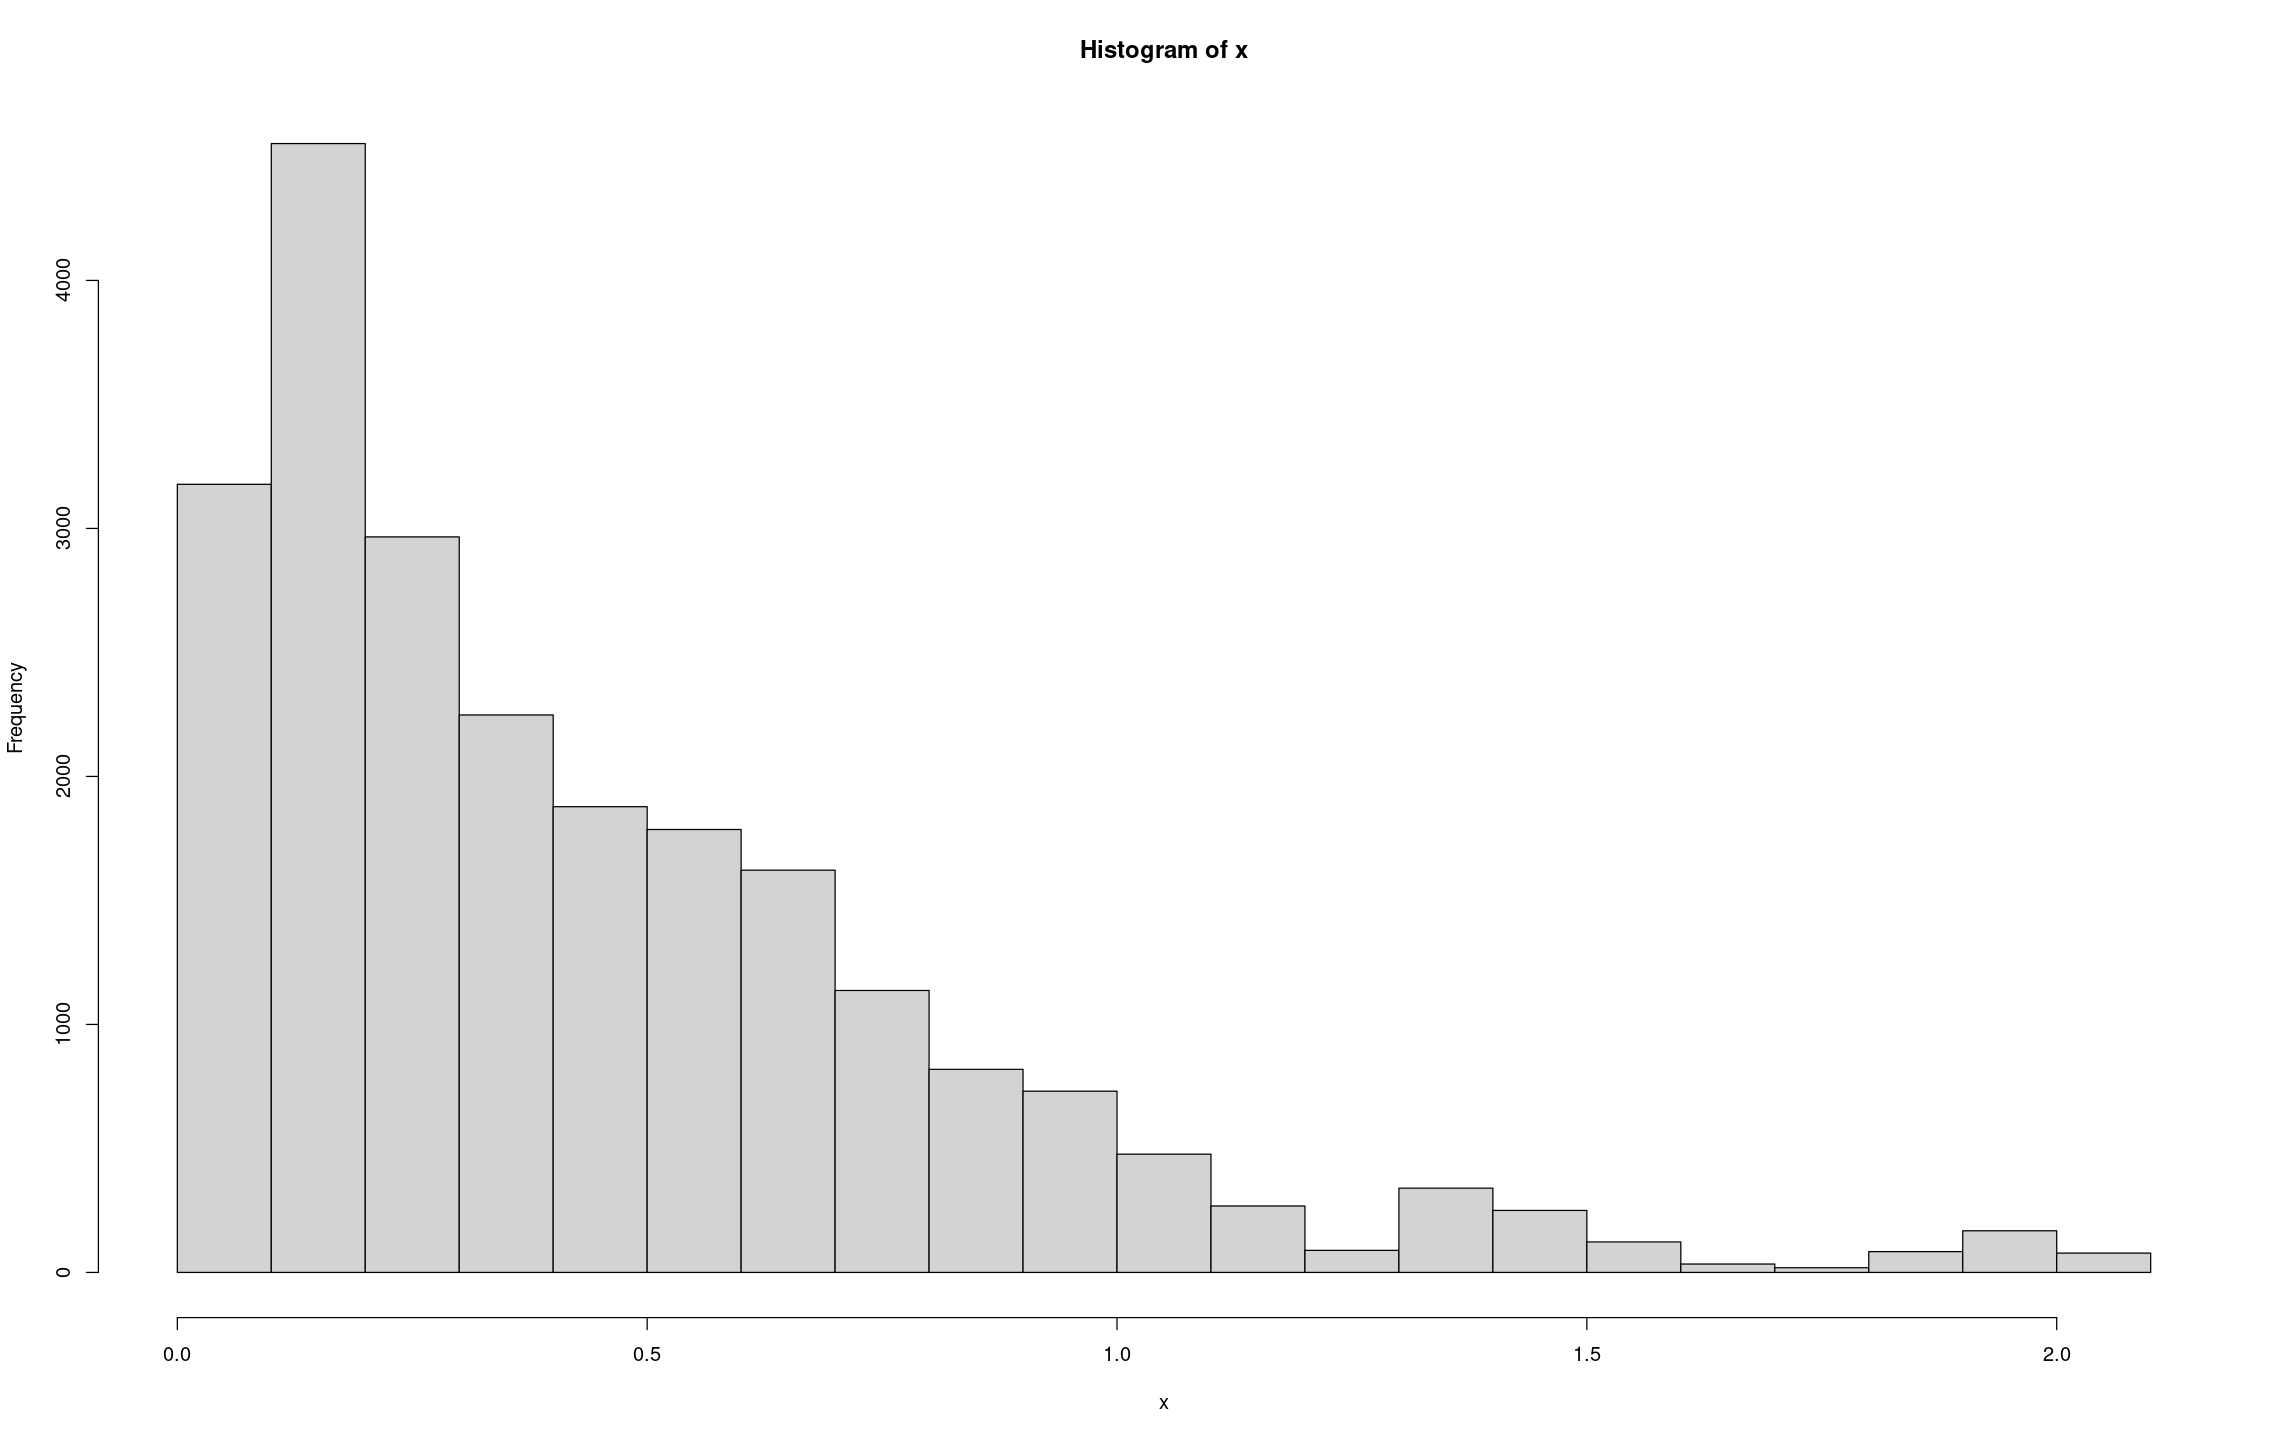

In [44]:
hist(x)

In [58]:
nlargest <- 2000
y <- extract_nlargest_sample(x, n = nlargest)

------------------------------------------------------------------------------ 
y (numeric)

       length            n          NAs       unique           0s         mean'
        2'000        2'000            0          = n            0  1.364166736
                    100.0%         0.0%                      0.0%             
                                                                              
          .05          .10          .25       median          .75          .90
  1.005640239  1.021433043  1.086939722  1.336183190  1.511123776  1.926739655
                                                                              
        range           sd        vcoef          mad          IQR         skew
  1.074140549  0.314164647  0.230297836  0.340266768  0.424184054  0.757412777
                                                                              
        meanCI
   1.350389774
   1.377943697
              
           .95
   1.988263330
              
          k

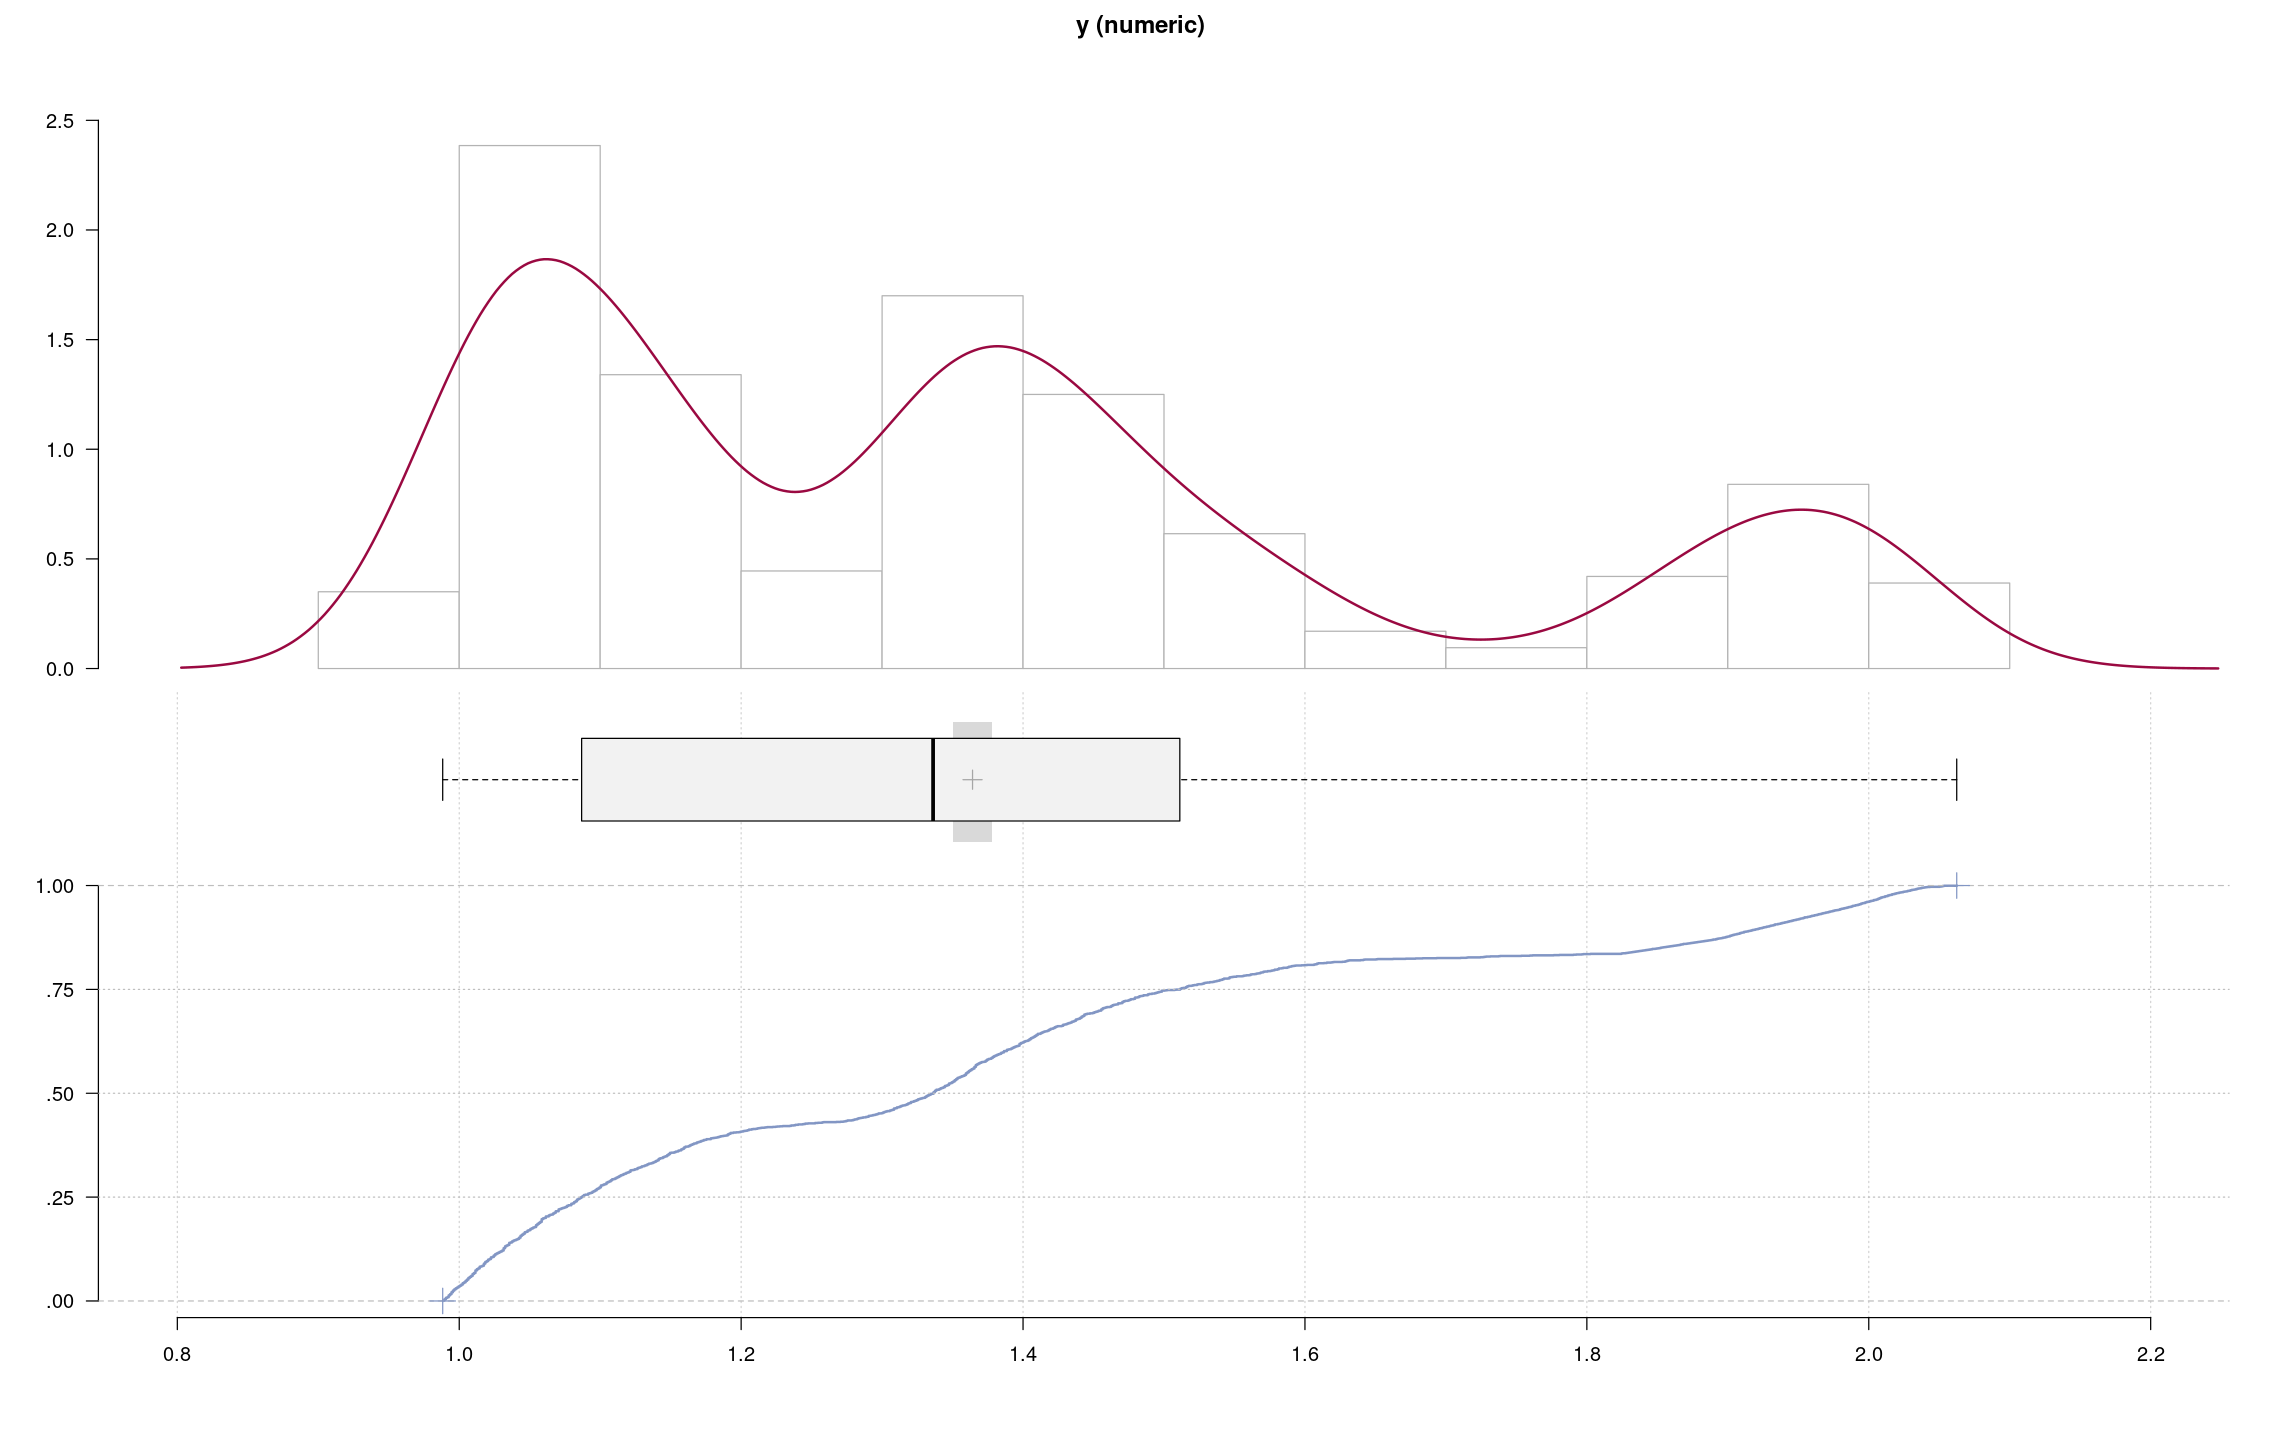

In [59]:
Desc(y)

# EVA: Stationary case

## Estimation

In [78]:
gev_mixture_model <- suppressWarnings(estimate_gev_mixture_model_parameters(x = x,
                                                                            kind = c("geometric", "arithmetic")[1],
                                                                            block_sizes = 3:40,
                                                                            minimum_nblocks = 50,
                                                                            threshold = min(y),
                                                                            nlargest = nlargest,
                                                                            confidence_level = 0.95,
                                                                            use_extremal_index = TRUE,
                                                                            use_lower_threshold = FALSE,
                                                                            maximum_iterations = 1500,
                                                                            log_mv = TRUE,
                                                                            log_pw = TRUE,
                                                                            trace = FALSE,
                                                                            method = "MLE"))


  Successful convergence.
  Successful convergence.


## Parameters

In [79]:
print(gev_mixture_model$automatic_weights_mw)

               3                4                5                6 
 1.000000000e+00  3.552713679e-14  0.000000000e+00  0.000000000e+00 
               7                8                9               10 
 0.000000000e+00  0.000000000e+00  0.000000000e+00  0.000000000e+00 
              11               12               13               14 
 0.000000000e+00  0.000000000e+00  0.000000000e+00 -1.776356839e-15 
              15               16               17               18 
-1.776356839e-15  0.000000000e+00 -1.776356839e-15 -8.881784197e-16 
              19               20               21               22 
-8.881784197e-16 -1.776356839e-15 -1.776356839e-15  8.881784197e-16 
              23               24               25               26 
-4.440892099e-16  1.332267630e-15  8.881784197e-16  1.332267630e-15 
              27               28               29               30 
-4.440892099e-16  4.440892099e-16  4.440892099e-16 -4.440892099e-16 
              31               32 

In [80]:
print(gev_mixture_model$extremal_indexes)

            3             4             5             6             7 
0.12207825203 0.07259263725 0.06189731968 0.07259263725 0.06189731968 
            8             9            10            11            12 
0.05658866965 0.04848417429 0.04848417429 0.04848417429 0.04848417429 
           13            14            15            16            17 
0.04848417429 0.03947320334 0.04428819110 0.03619118355 0.03947320334 
           18            19            20            21            22 
0.03842652888 0.03884356409 0.03800987553 0.03884356409 0.03498943529 
           23            24            25            26            27 
0.03498943529 0.03448023940 0.02929978439 0.03498943529 0.02520838468 
           28            29            30            31            32 
0.02520838468 0.03498943529 0.02614654224 0.02929978439 0.02520838468 
           33            34            35            36            37 
0.03498943529 0.02567313021 0.02932433192 0.02230411252 0.02614654224 
      

In [81]:
print(gev_mixture_model$normalized_gev_parameters_object)

         loc_star   scale_star       shape_star
3   1.01567360910 0.1619281011  0.2330573323046
4   0.96988829524 0.1608241828  0.2099594481116
5   0.93347188433 0.1632688225  0.1825985200556
6   0.90804607867 0.1608721871  0.1730627064024
7   0.87851822705 0.1606180610  0.1687340129952
8   0.85176823321 0.1653496177  0.1505298323587
9   0.83633956893 0.1658594491  0.1422333735205
10  0.82147670411 0.1625436317  0.1440745323027
11  0.79028022848 0.1714109718  0.1253286258631
12  0.76023755902 0.1854688948  0.0956097277817
13  0.74991934026 0.1792101063  0.1094005818476
14  0.74719482775 0.1718044171  0.1161385922093
15  0.66205634636 0.2281969761  0.0296210729746
16  0.66164718594 0.2158707689  0.0470625496226
17  0.68086778358 0.1983214977  0.0667488611382
18  0.59010449097 0.2492486812  0.0040453652951
19  0.59355291378 0.2424911501  0.0108852524270
20  0.59585954159 0.2296009652  0.0254293966636
21  0.56912893247 0.2416304681  0.0142107189445
22  0.60443011501 0.2072870628  0.055506

In [82]:
print(gev_mixture_model$full_normalized_gev_parameters_object)

         loc_star    scale_star       shape_star
3   0.74646652986 0.09918741737  0.2330573323046
4   0.64553178476 0.09272246889  0.2099594481116
5   0.57731205769 0.09823456525  0.1825985200556
6   0.56887797243 0.10217483666  0.1730627064024
7   0.52187592214 0.10044037370  0.1687340129952
8   0.46621836717 0.10731286101  0.1505298323587
9   0.42843765348 0.10784218360  0.1422333735205
10  0.42276170114 0.10509895411  0.1440745323027
11  0.35854619729 0.11730233893  0.1253286258631
12  0.27282834901 0.13886783288  0.0956097277817
13  0.28818766549 0.12869639242  0.1094005818476
14  0.28421864342 0.11803501485  0.1161385922093
15 -0.01739274195 0.20807096510  0.0296210729746
16 -0.00166304141 0.18465369839  0.0470625496226
17  0.10429603377 0.15983599004  0.0667488611382
18 -0.21686755830 0.24598418447  0.0040453652951
19 -0.18034769828 0.23406704659  0.0108852524270
20 -0.12454813778 0.21128143260  0.0254293966636
21 -0.19789928174 0.23073044571  0.0142107189445
22 -0.02970803664 0.

## Diagnostic

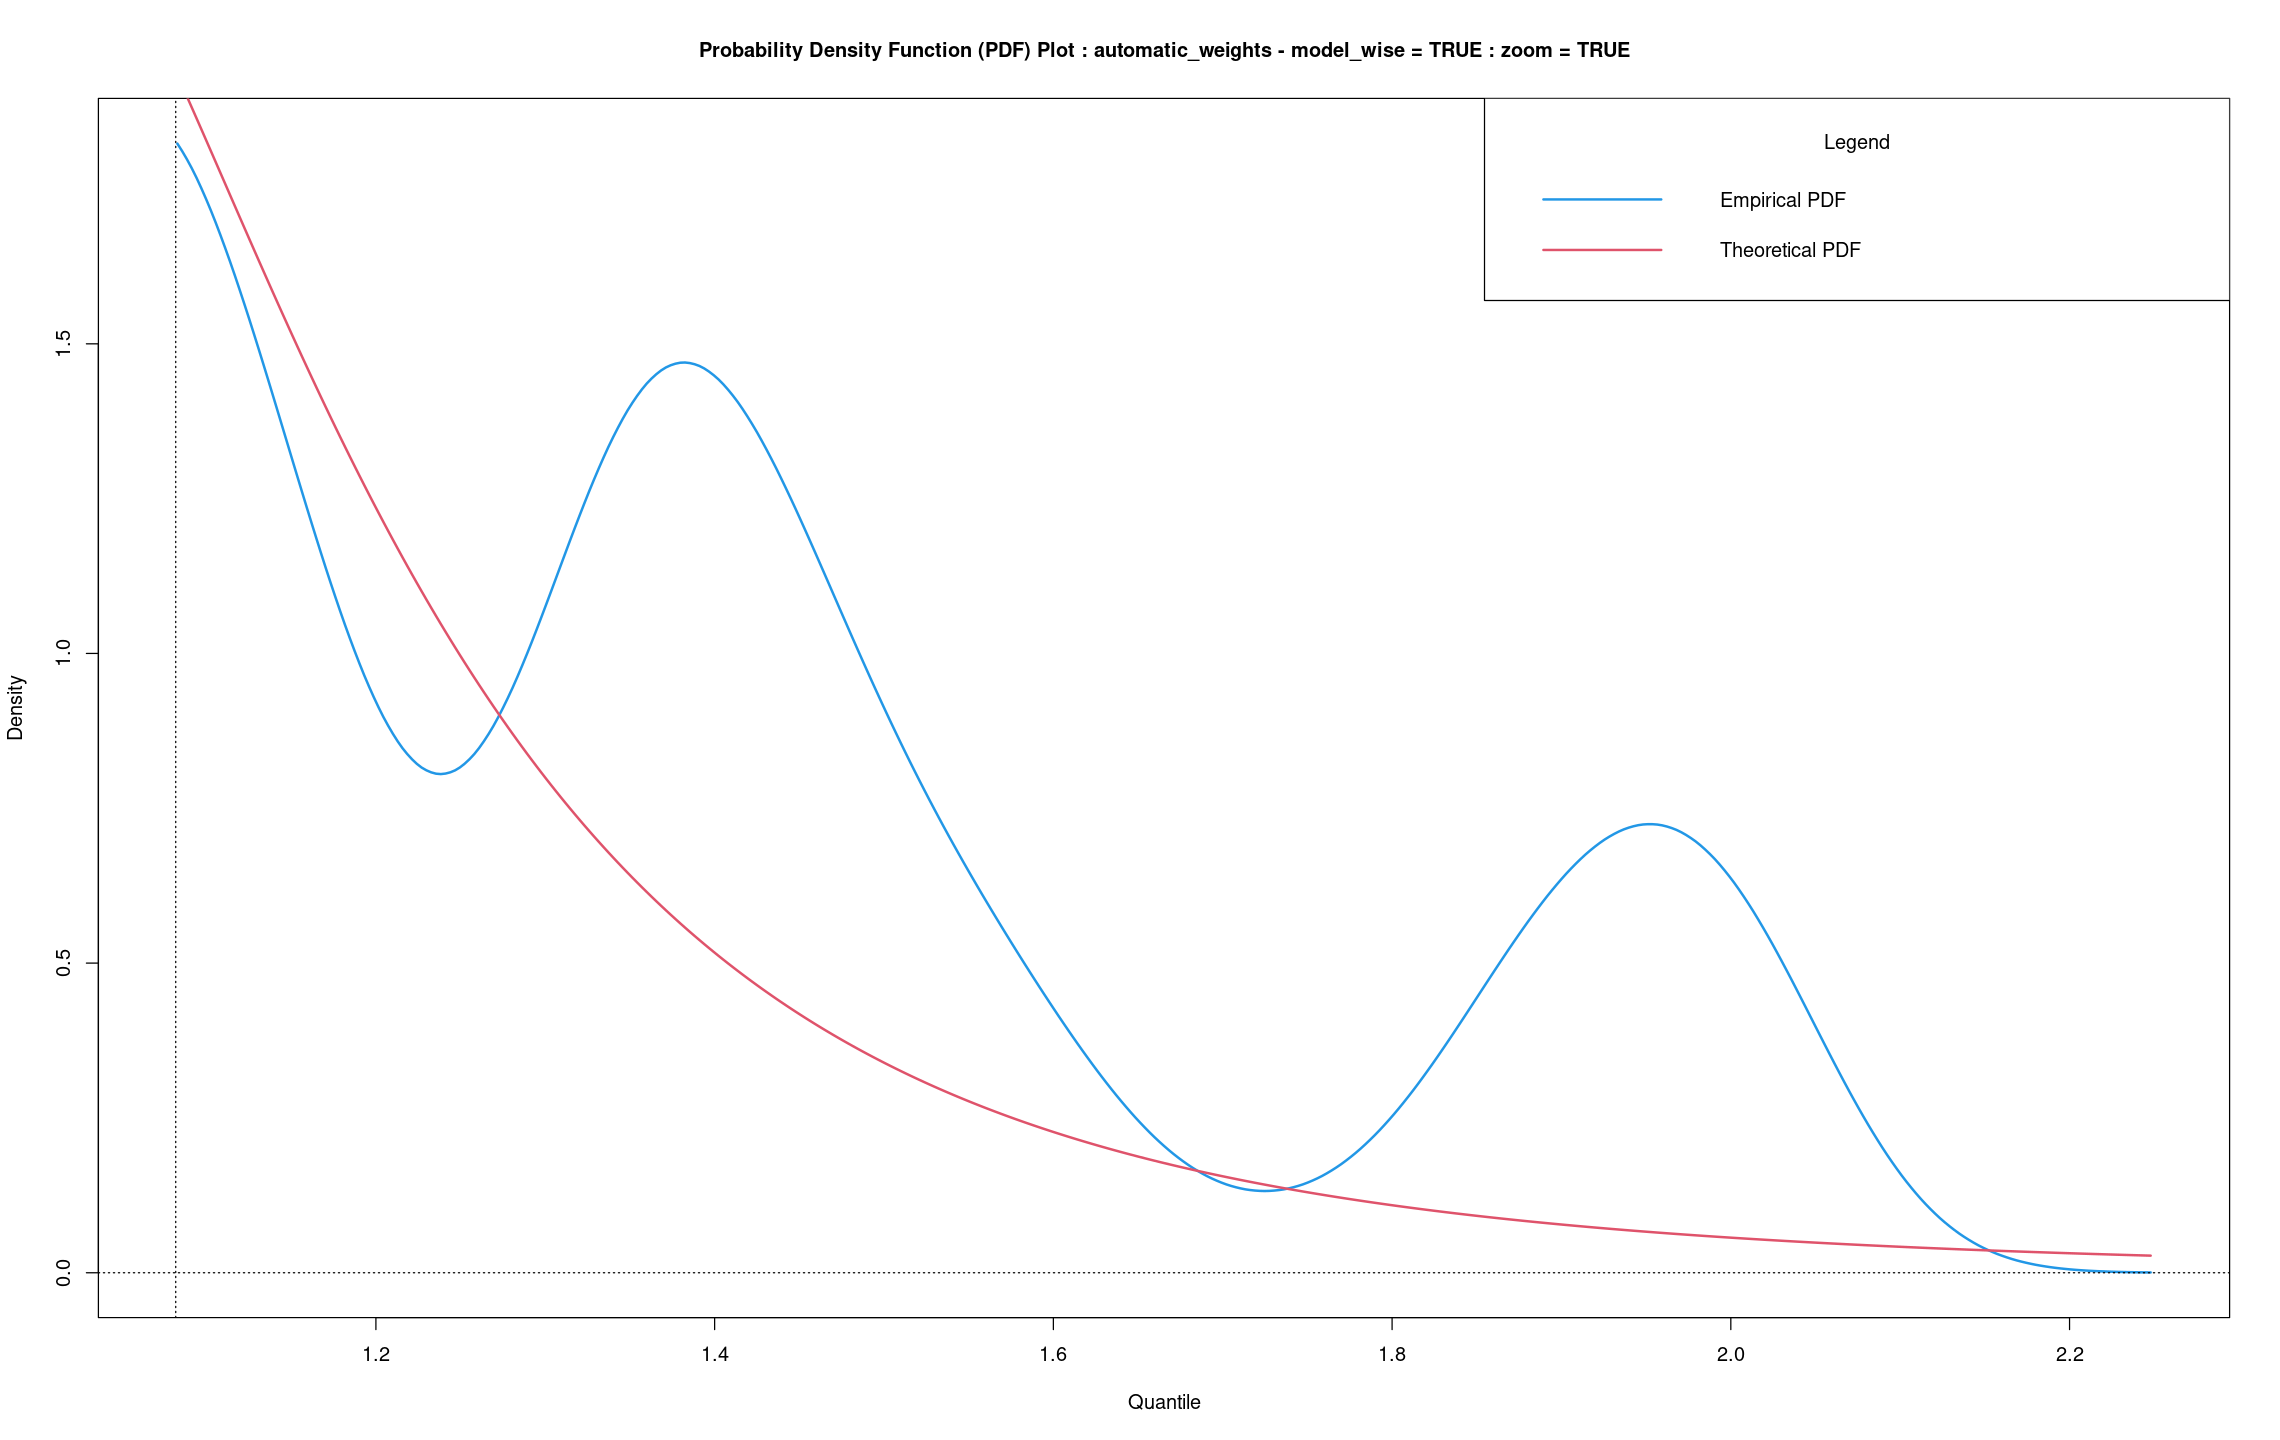

In [83]:
plot_gev_mixture_model_pdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Density",
                           main = "Probability Density Function (PDF) Plot")

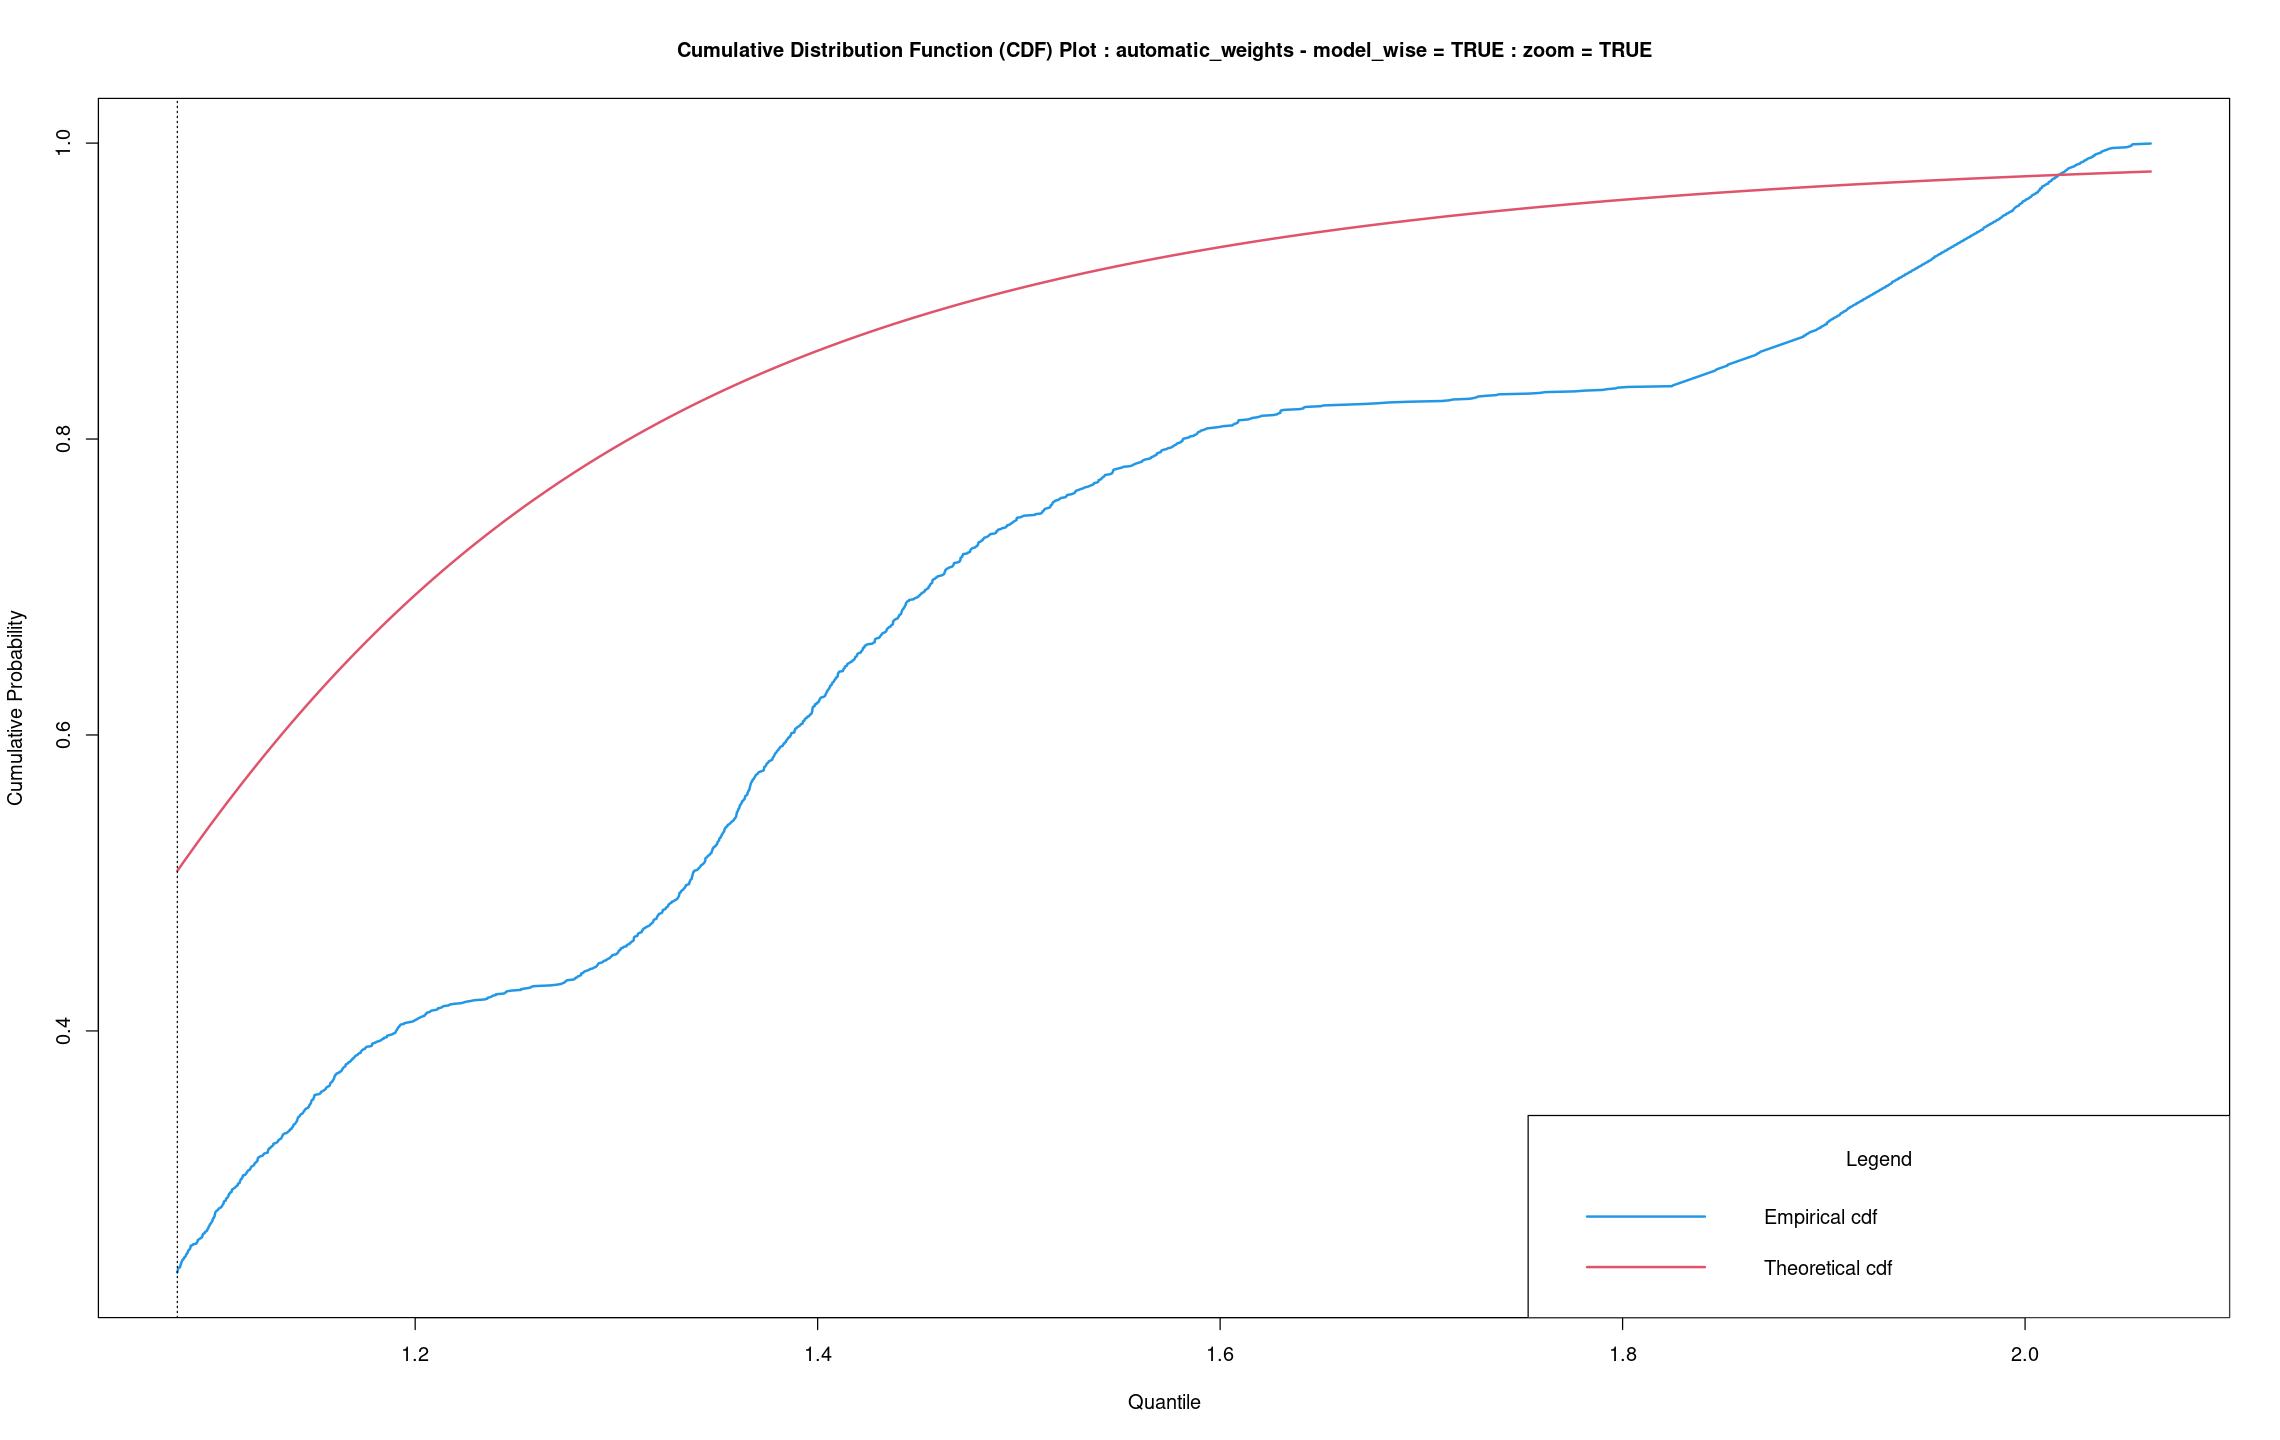

In [70]:
plot_gev_mixture_model_cdf(gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Cumulative Probability",
                           main = "Cumulative Distribution Function (CDF) Plot")

## Quantiles

In [72]:
estimator_types <- c("automatic_weights_mw", 
                     "pessimistic_weights_mw", 
                     "identic_weights_mw", 
                     "automatic_weights_pw",
                     "pessimistic_weights_pw", 
                     "identic_weights_pw", 
                     "model_wise",
                     "parameter_wise",
                     "empirical")

In [73]:
alpha <- 10^(-14)

In [74]:
rl_mw <- estimate_gev_mixture_model_quantile(gev_mixture_model,
                                             alpha = alpha,
                                             confidence_level = 0.95,
                                             do.ci = TRUE,
                                             estimator_type = estimator_types[1])

rl_mw

[1] 442.1082286

In [75]:
est_rl_pw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[8]))
est_rl_pw

lower          quantile      upper        
3  -852.324439767 443.064359327 1738.45315842
4  -526.811315431 229.262838759  985.33699295
5  -308.611608364 124.141626593  556.89486155
6  -276.093076350 102.474940115  481.04295658
7  -280.993400413  90.794520927  462.58244227
8  -199.134511472  62.849002887  324.83251724
9  -172.227843595  52.248061968  276.72396753
10 -190.733978925  53.116224209  296.96642734
11 -140.510086412  38.633217271  217.77652095
12  -80.372630295  23.913995093  128.20062048
13 -115.418040513  29.773381112  174.96480274
14 -131.875678099  31.642017346  195.15971279
15  -27.418893420   9.938536061   47.29596554
16  -40.017275424  12.013843040   64.04496150
17  -55.490529095  15.212516787   85.91556267
18  -19.840854789   7.573736376   34.98832754
19  -22.994669620   8.059236602   39.11314282
20  -30.368119618   9.293804113   48.95572784
21  -27.136674499   8.363178936   43.86303237
22  -58.680152488  13.079201661   84.83855581
23  -60.921019078  13.262691504   87.44640209
24  -11.050122790   4.564875280   20.17987335
25  -10.439523933   4.497595579   19.43471509
26  -25.677511794   7.351020874   40.37955354
27  -16.594509720   5.490849470   27.57620866
28  -29.780769969   7.439372248   44.65951446
29  -10.104593239   3.933698351   17.97198994
30   -7.531471819   3.404202579   14.33987698
31  -12.865558294   4.333155430   21.53186915
32  -15.078937117   4.790863220   24.66066356
33  -13.317685032   4.626614874   22.57091478
34  -12.720564164   4.320387952   21.36134007
35   -9.618348013   3.674736283   16.96782058
36  -12.996507757   4.016026338   21.02856043
37   -7.368672851   3.012801210   13.39427527
38   -9.693241230   3.125318611   15.94387845
39  -11.336218644   3.654892657   18.64600396
40  -10.611189072   3.500267959   17.61172499

In [76]:
est_rl_mw <- suppressWarnings(estimate_gev_mixture_model_quantile(gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[7]))
est_rl_mw

lower          quantile      upper        
3  -852.324439767 443.064359327 1738.45315842
22  -58.680152488  13.079201661   84.83855581
24  -11.050122790   4.564875280   20.17987335
25  -10.439523933   4.497595579   19.43471509
26  -25.677511794   7.351020874   40.37955354
28  -29.780769969   7.439372248   44.65951446
29  -10.104593239   3.933698351   17.97198994
31  -12.865558294   4.333155430   21.53186915
33  -13.317685032   4.626614874   22.57091478
34  -12.720564164   4.320387952   21.36134007
35   -9.618348013   3.674736283   16.96782058
39  -11.336218644   3.654892657   18.64600396

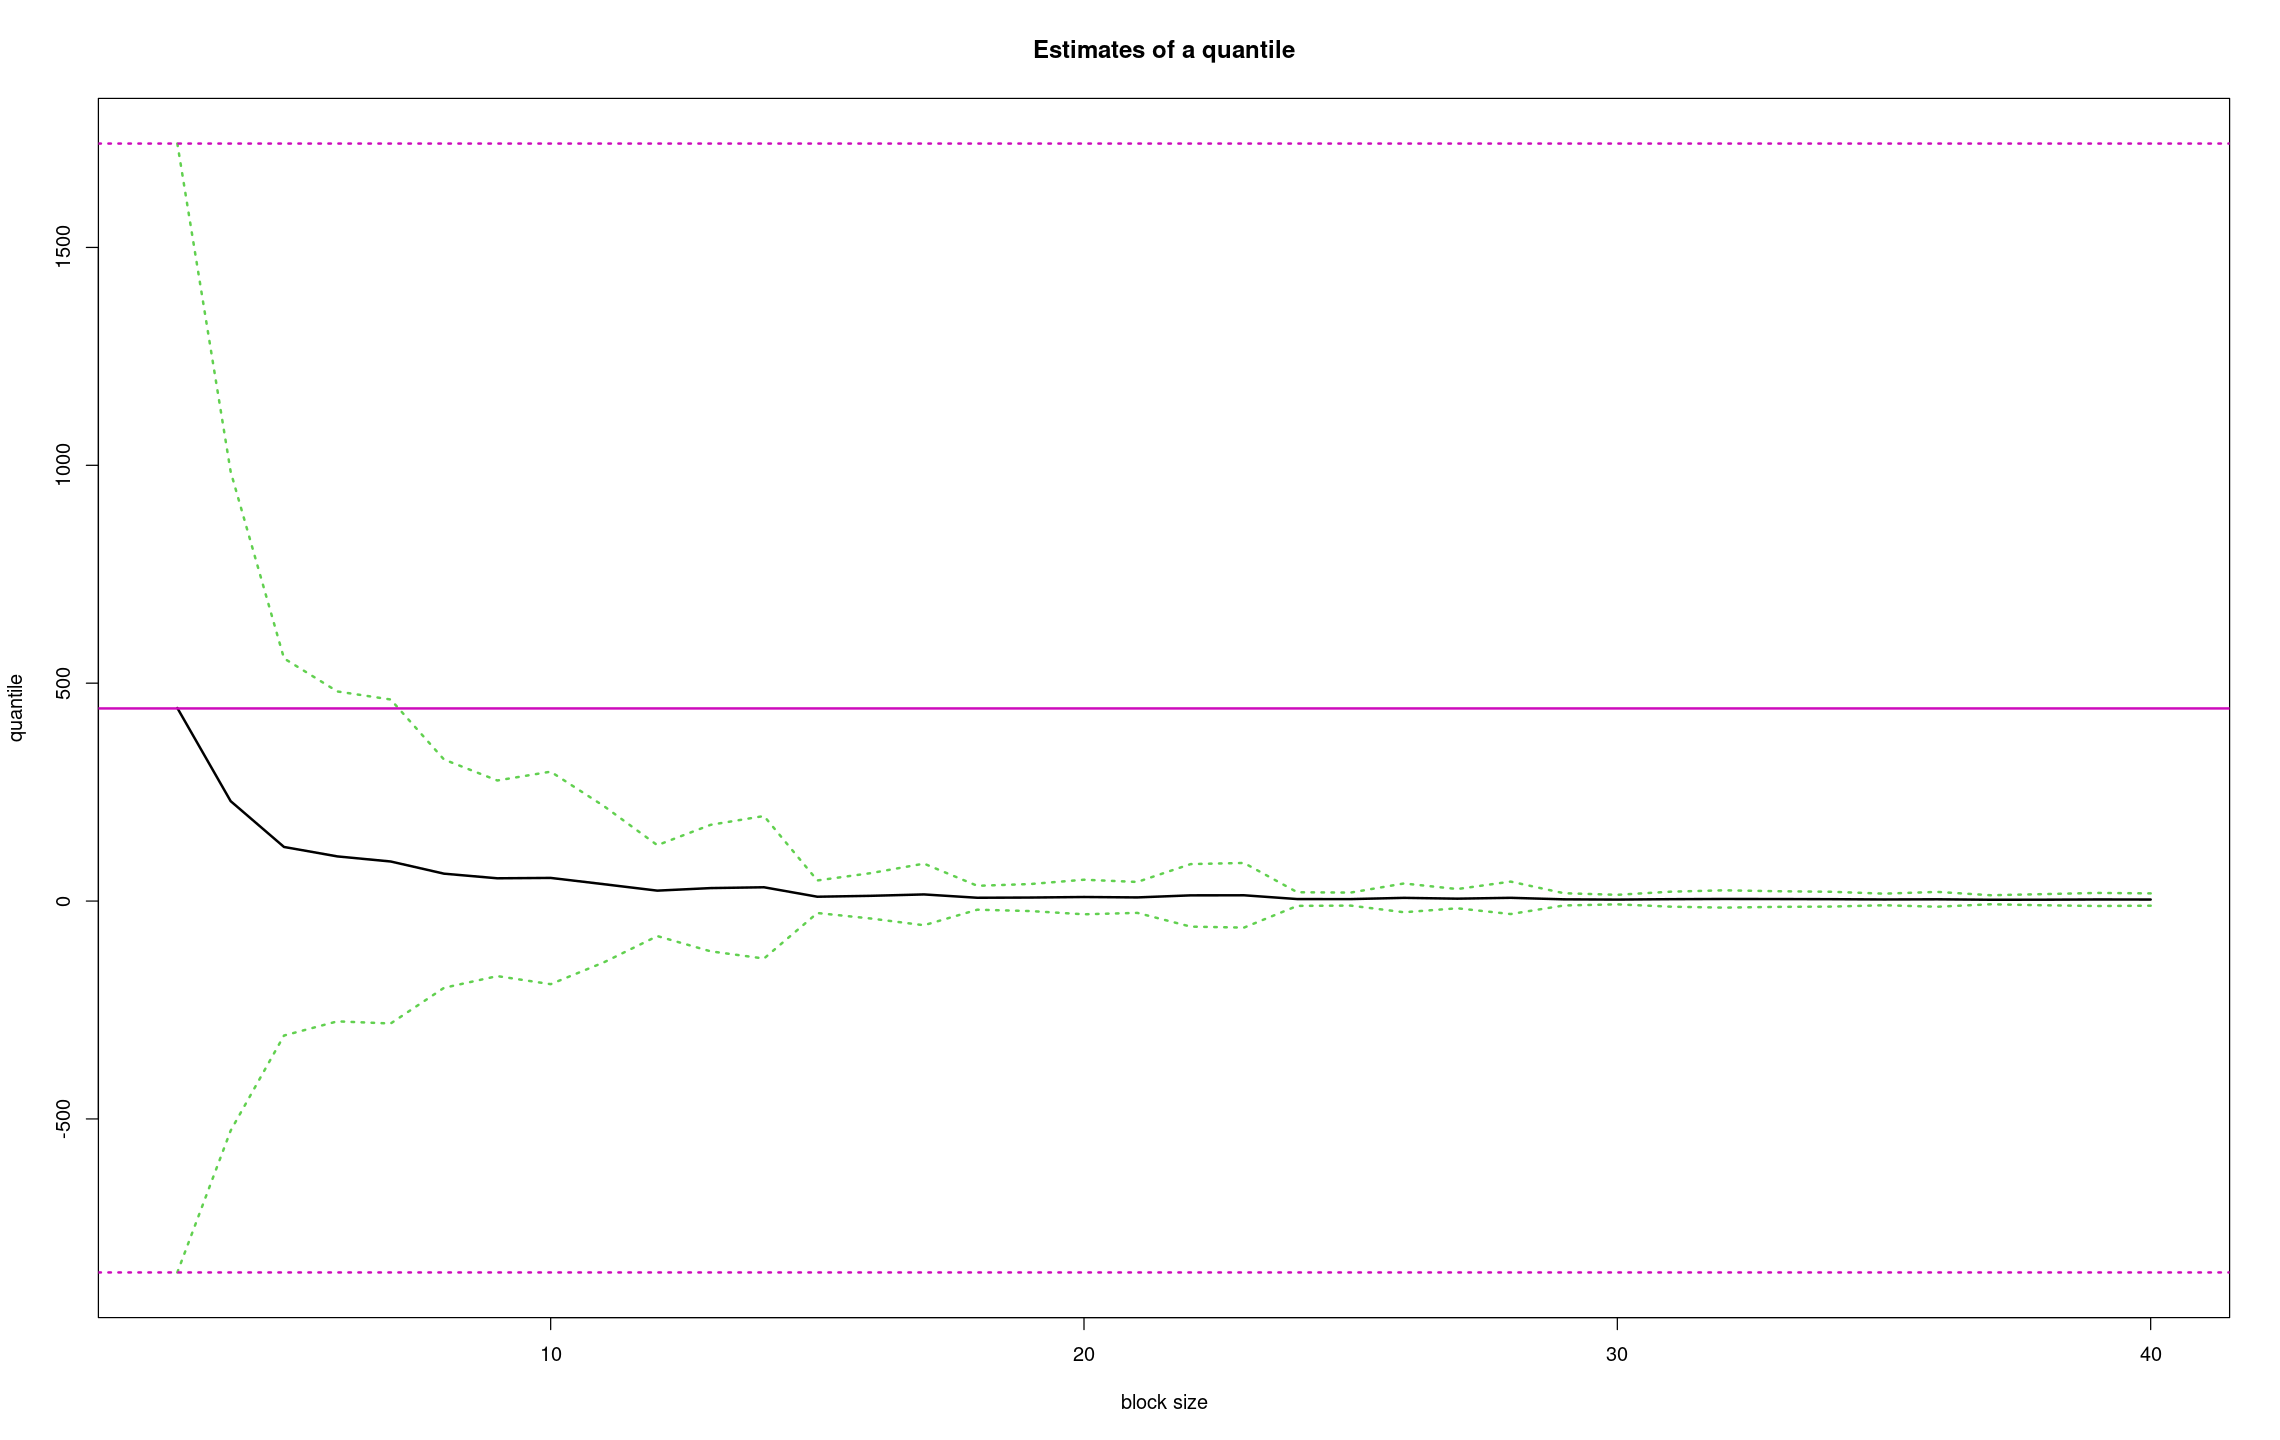

In [77]:
matplot(x = rownames(est_rl_pw), 
        y = est_rl_pw, 
        xlab = "block size",
        ylab = "quantile",
        main = "Estimates of a quantile",
        ylim = range(est_rl_pw),
        cex = 1,
        cex.lab = 1,
        cex.axis = 1,
        type = "l", 
        lty = c("dotted", "solid", "dotted"), 
        lwd = c(2,2,2), 
        col = c(3, 1, 3))

abline(h = rl_mw, col = 6, lwd = 2)
abline(h = range(est_rl_pw), col = 6, lty = "dotted", lwd = 2)

In [120]:
# Legend:
# pink: Quantile from GEV geometric mixture model with respect to distribution functions


# EVA: Non-stationary case

In [23]:
print(names(data))

 [1] "timestamp"              "latitude"               "longitude"             
 [4] "velocity_latitude"      "velocity_longitude"     "velocity"              
 [7] "lateral_error"          "longitudinal_error"     "haversine_error"       
[10] "latitude_error"         "longitude_error"        "heading_error"         
[13] "lateral_error_abs"      "longitudinal_error_abs" "haversine_error_abs"   
[16] "latitude_error_abs"     "longitude_error_abs"    "heading_error_abs"     
[19] "area"                   "object"                 "name_airplane"         
[22] "name_bench"             "name_bench..group."     "name_bicycle"          
[25] "name_bird"              "name_bird..group."      "name_boat"             
[28] "name_bus"               "name_car"               "name_car..group."      
[31] "name_dog"               "name_electric.pole"     "name_fence"            
[34] "name_fire.hydrant"      "name_gas.station"       "name_helicopter"       
[37] "name_house"             "name_hous

In [26]:
data_covariates <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [37]:
# data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = NULL)
data_covariates_scaled <- data.frame(scale(data_covariates))

In [38]:
tail(data_covariates_scaled)

velocity_latitude velocity_longitude velocity     area         
22841 -0.0332972023137   0.0054694369619   -1.589693733 -0.9672426335
22842 -0.0202230892048   0.0027034272771   -1.603080366 -1.0645264504
22843 -0.0159199408558   0.0019702178001   -1.607376525 -0.8648414191
22844 -0.0180557717010   0.0028553583001   -1.604914428 -0.9448906157
22845 -0.0048148967384   0.0001407522949   -1.618372020 -0.9357028235
22846 -0.0002916803714  -0.0001133146056   -1.622362989 -1.0869082360
      object      
22841 -1.480725888
22842 -1.391592846
22843 -1.213326760
22844 -1.213326760
22845 -1.213326760
22846 -1.213326760

------------------------------------------------------------------------------ 
data_covariates_scaled$velocity_latitude (numeric)

           length                n                 NAs          unique'
           22'846           22'846                   0          22'182
                            100.0%                0.0%                
                                                                      
              .05              .10                 .25          median
  -1.648703565201  -1.380436210169     -0.722818510307  0.007504599679
                                                                      
            range               sd               vcoef             mad
   5.956472557894   1.000000000000  7.631034420152e+14  1.100256898658
                                                                      
              0s                mean           meanCI
               0  1.310438329775e-15  -0.012967791375
            0.0%                       0.01296779

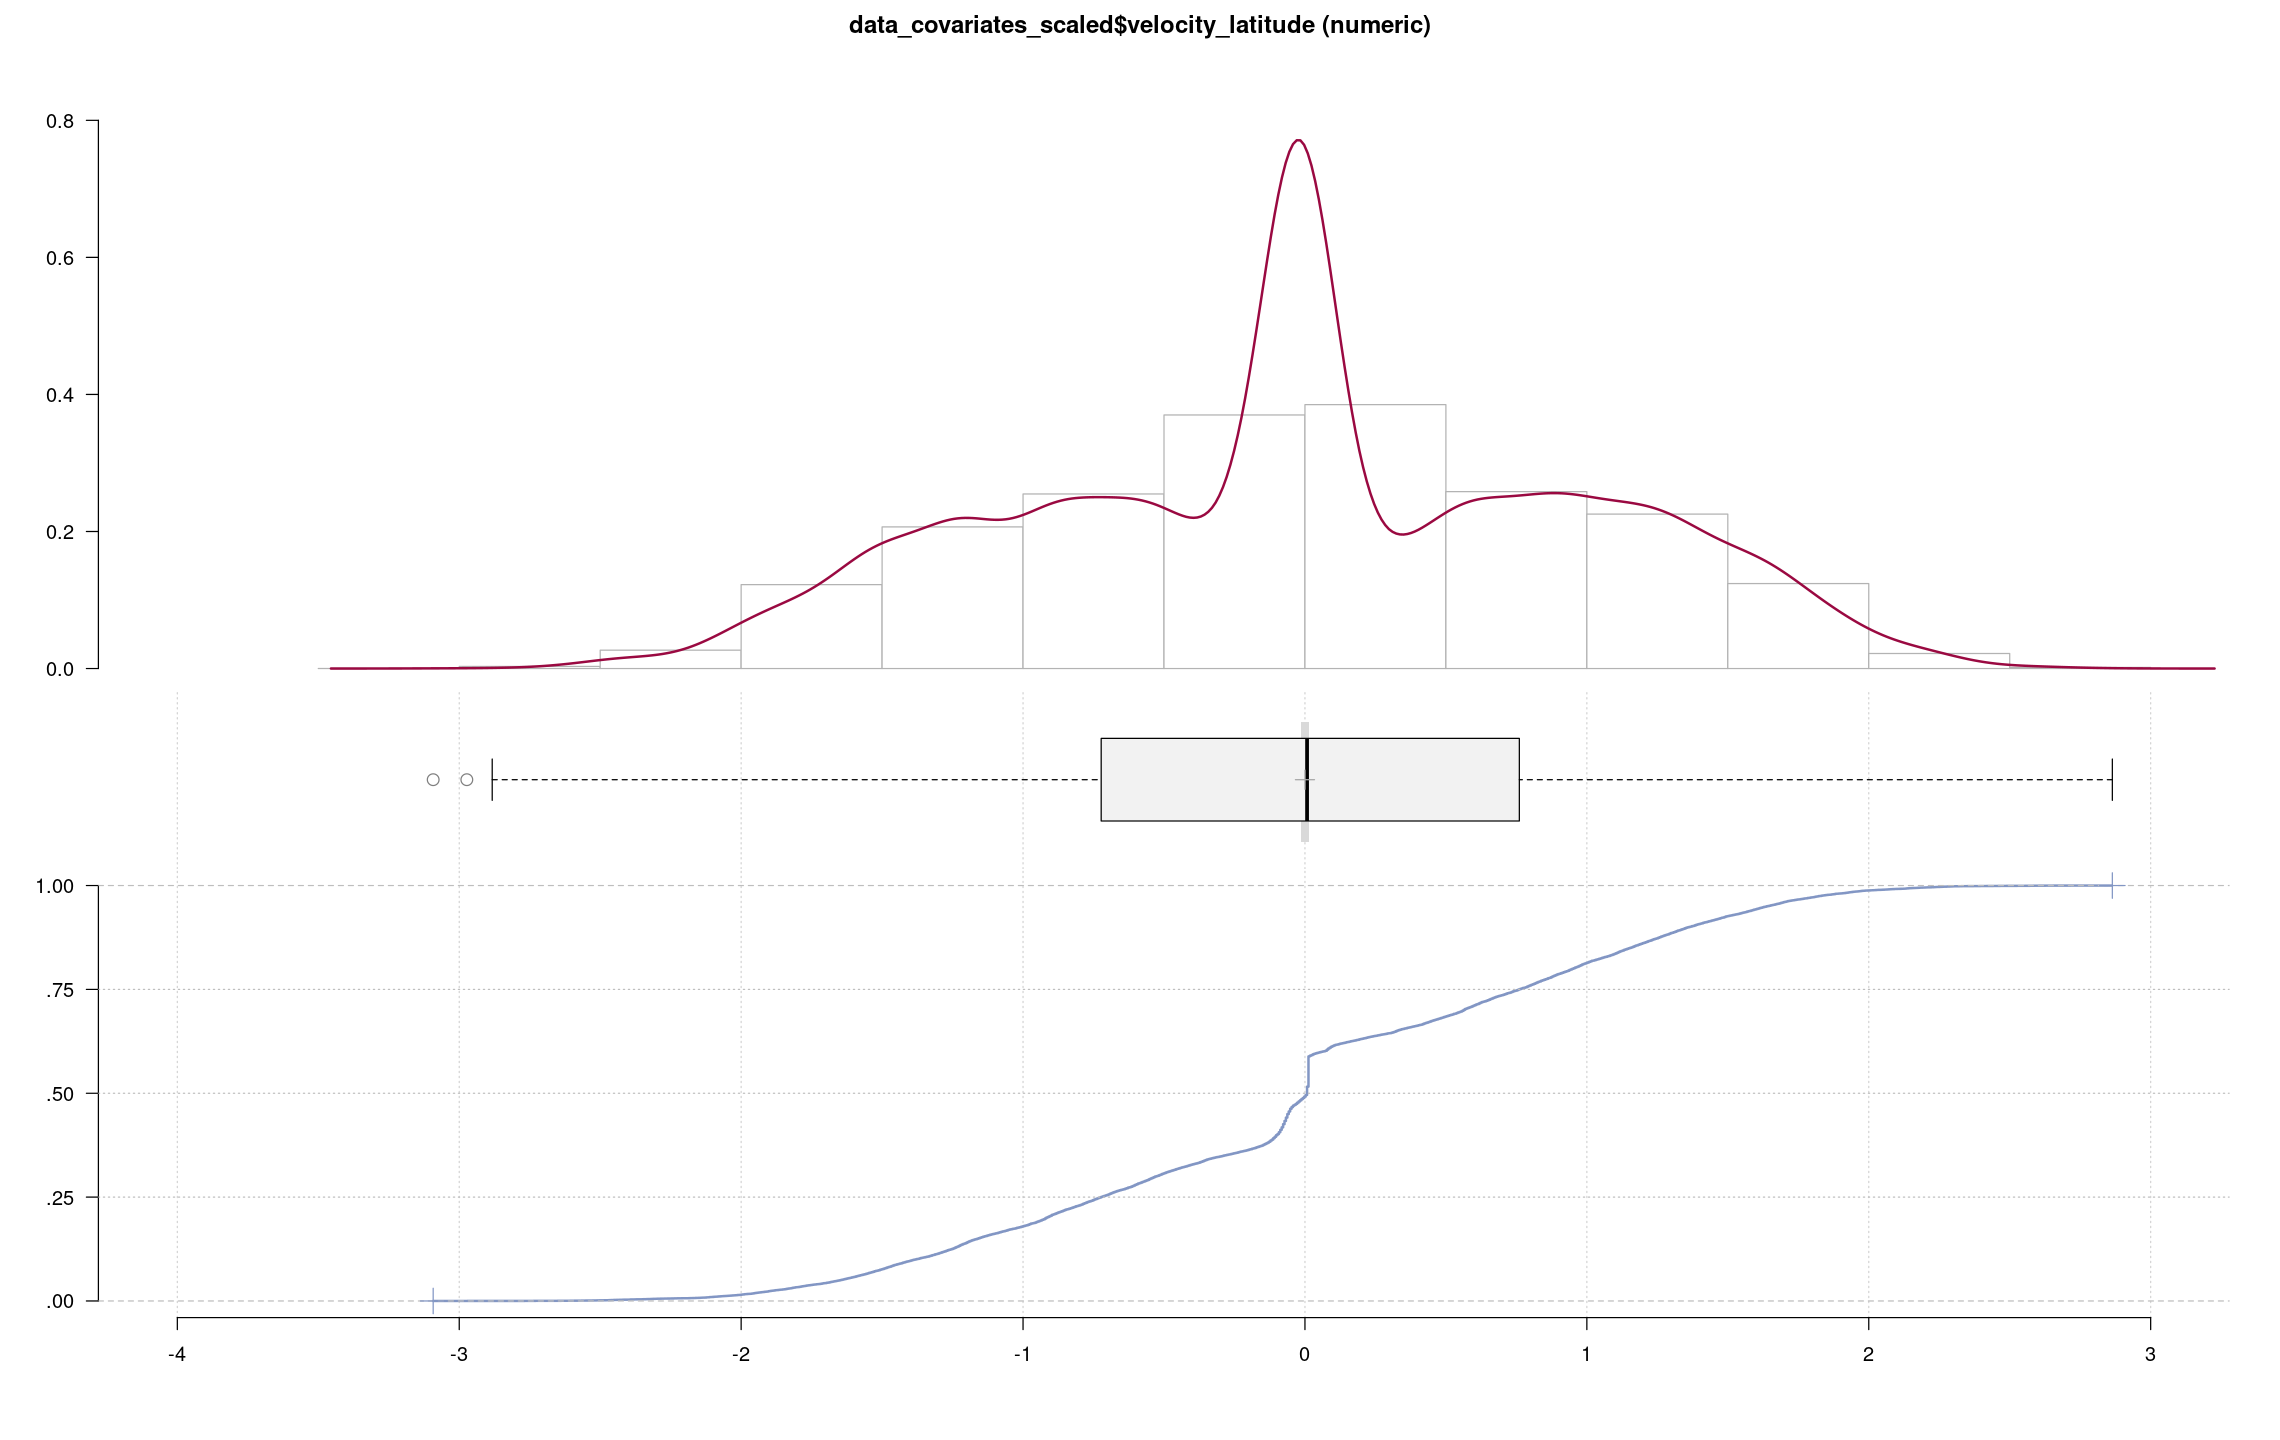

In [39]:
Desc(data_covariates_scaled$velocity_latitude)

------------------------------------------------------------------------------ 
data_covariates_scaled$velocity_longitude (numeric)

           length                n                 NAs           unique'
           22'846           22'846                   0           22'377
                            100.0%                0.0%                 
                                                                       
              .05              .10                 .25           median
  -1.633784411736  -1.369227829715     -0.651490998032  -0.004047776877
                                                                       
            range               sd               vcoef              mad
   9.199566620247   1.000000000000  4.901634863221e+14   0.891600378786
                                                                       
              0s                mean           meanCI
               0  2.040135644341e-15  -0.012967791375
            0.0%                      

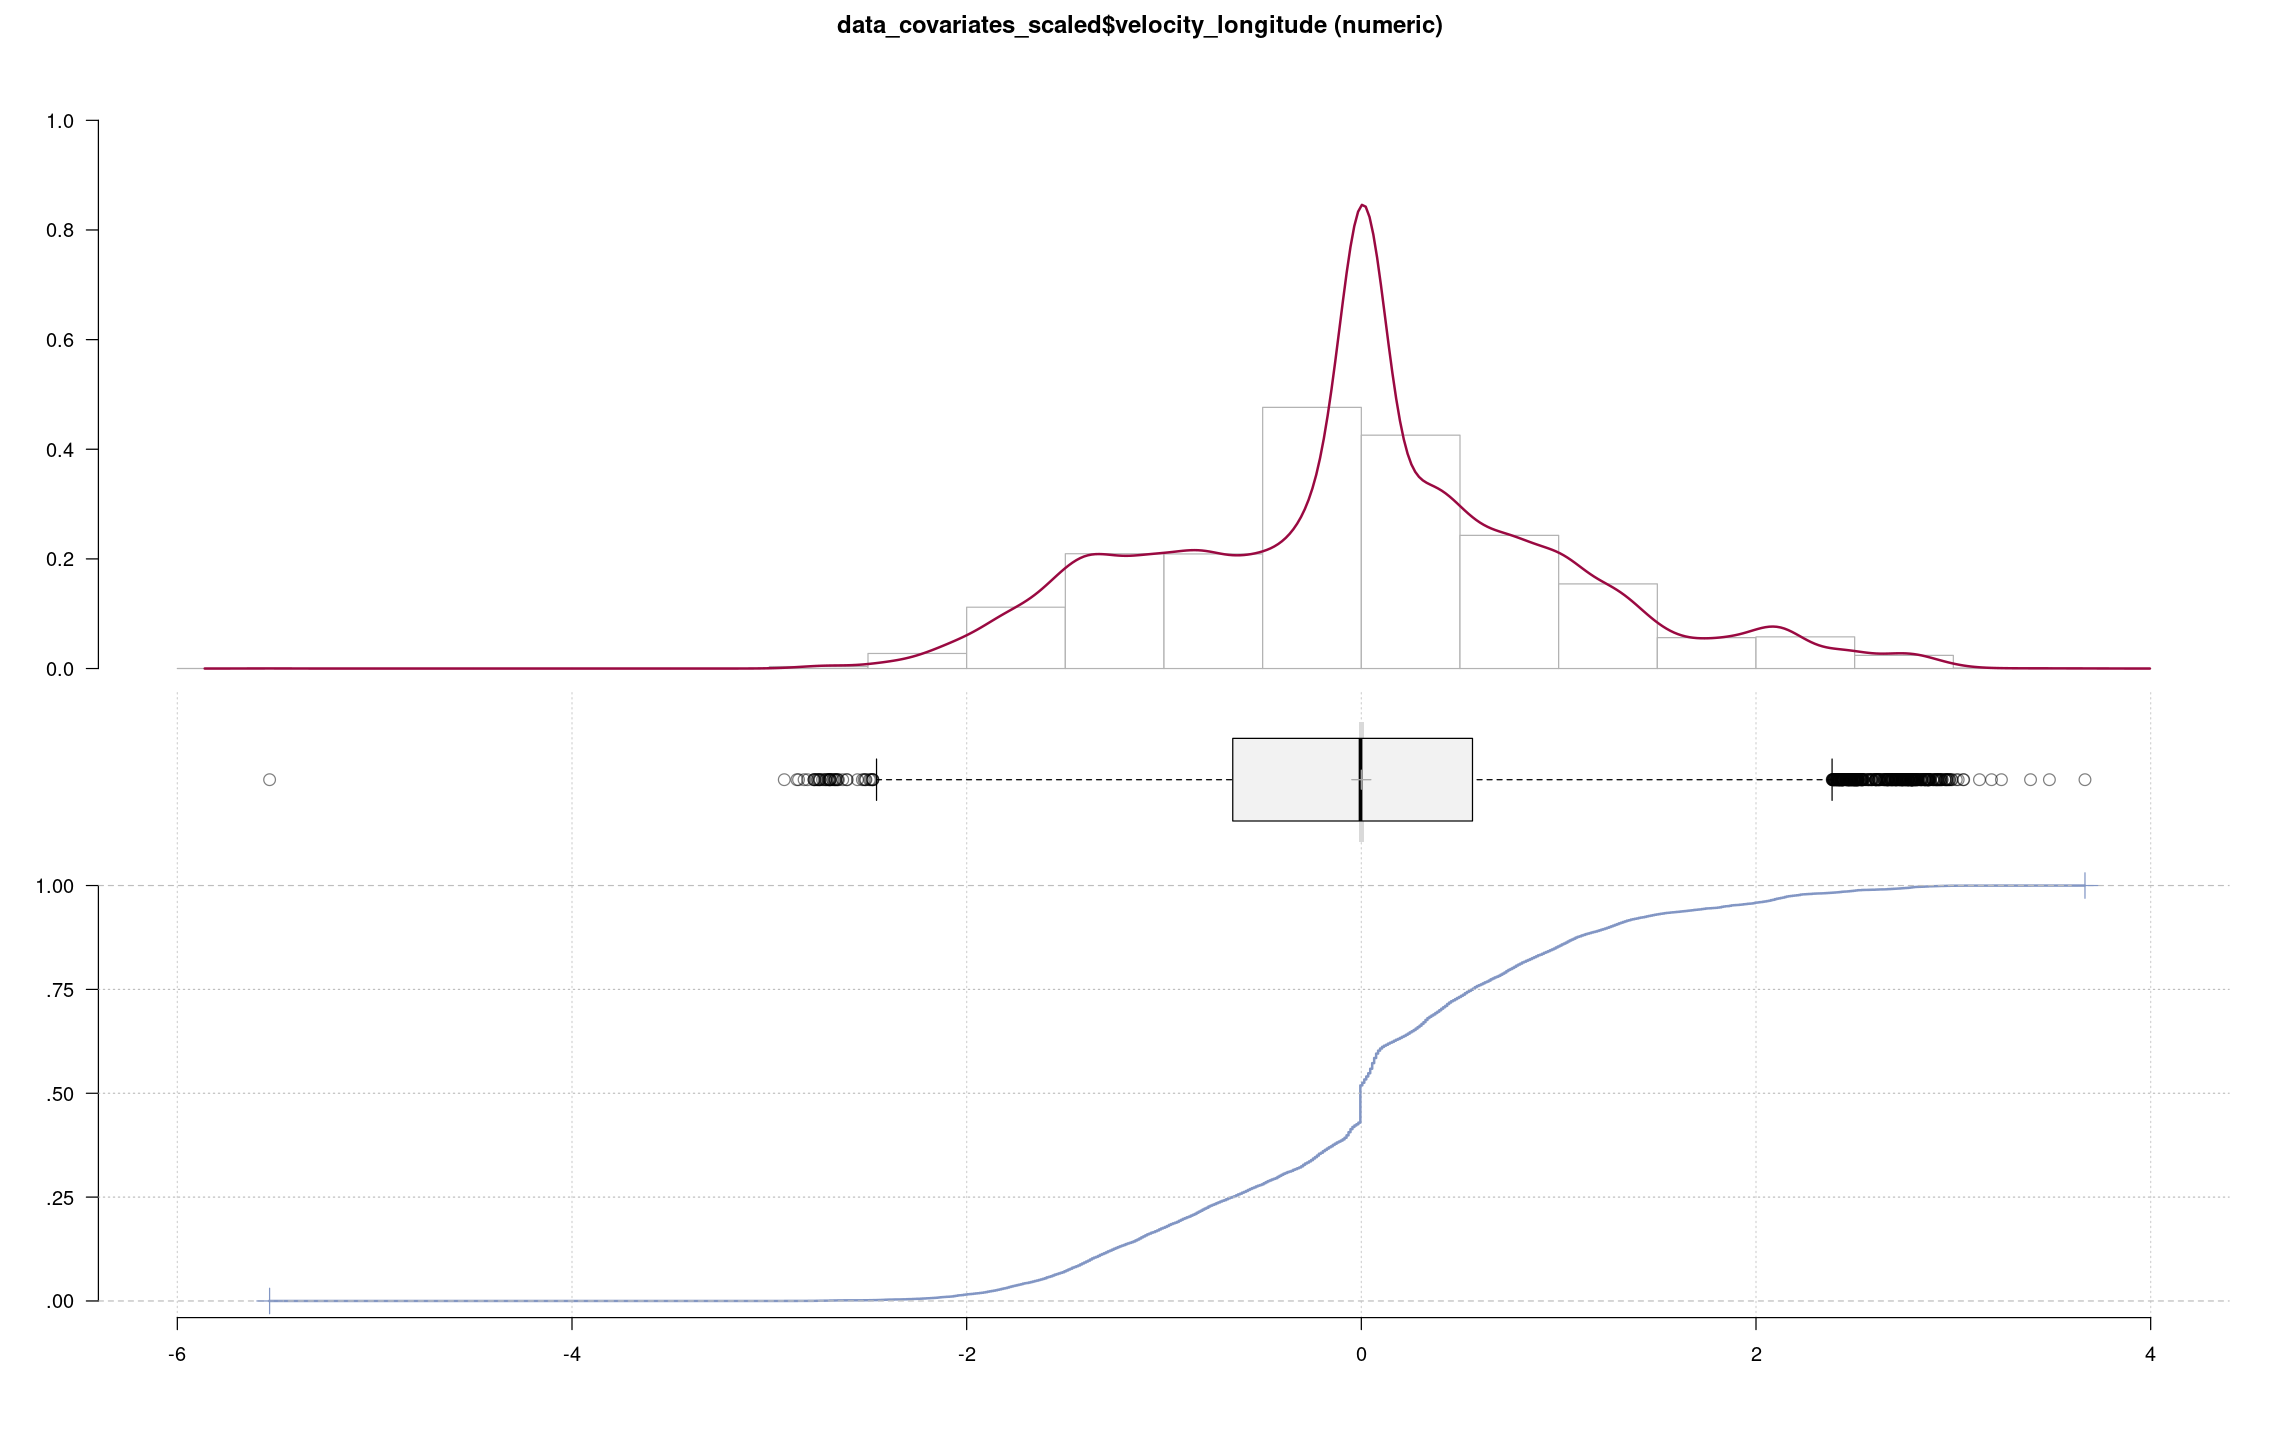

In [40]:
Desc(data_covariates_scaled$velocity_longitude)

In [41]:
Desc(data_covariates_scaled$velocity)

------------------------------------------------------------------------------ 
data_covariates_scaled$velocity (numeric)

          length               n                 NAs          unique'
          22'846          22'846                   0          22'601
                          100.0%                0.0%                
                                                                    
             .05             .10                 .25          median
  -1.63449468800  -1.54054746777      -0.58453752482  -0.04233074017
                                                                    
           range              sd               vcoef             mad
   9.16689229331   1.00000000000  -4.50375733576e+14   0.84632593653
                                                                    
             0s                mean          meanCI
              0  -2.22036829573e-15  -0.01296779138
           0.0%                       0.01296779138
                              

In [42]:
Desc(data_covariates_scaled$area)

------------------------------------------------------------------------------ 
data_covariates_scaled$area (numeric)

          length               n                NAs          unique'
          22'846          22'846                  0          22'844
                          100.0%               0.0%                
                                                                   
             .05             .10                .25          median
  -1.49756390355  -1.23358046280     -0.71435932669  -0.08555414721
                                                                   
           range              sd              vcoef             mad
   8.22447957826   1.00000000000  6.79818941029e+14   0.98909241804
                                                                   
             0s               mean          meanCI
              0  1.47097990310e-15  -0.01296779138
           0.0%                      0.01296779138
                                               

In [43]:
Desc(data_covariates_scaled$object)

------------------------------------------------------------------------------ 
data_covariates_scaled$object (numeric)

         length              n                NAs         unique            0s'
         22'846         22'846                  0             71             0
                        100.0%               0.0%                         0.0%
                                                                              
            .05            .10                .25         median           .75
  -1.4807258881  -1.2133267604      -0.7676615477  -0.1437302498  0.7476001757
                                                                              
          range             sd              vcoef            mad           IQR
   6.3284460210   1.0000000000  -6.0982241043e+15   1.0571891911  1.5152617233
                                                                              
           mean         meanCI
  -0.0000000000  -0.0129677914
                  0.012967

In [44]:
print(names(data_covariates_scaled))

[1] "velocity_latitude"  "velocity_longitude" "velocity"          
[4] "area"               "object"            


In [46]:
single_ns_gev_model <- estimate_single_ns_gev_model(
    x = x,
    block_size = 200,
    data = data_covariates_scaled,
    location.fun = ~ velocity,
    scale.fun = ~ velocity,
    shape.fun = ~ velocity,
    use.phi = TRUE,
    type = c("GEV", "Gumbel")[1],
    method = c("MLE", "GMLE")[1]
)
 

ERROR: Error in na.fail.default(tmp): missing values in object


In [114]:
print(names(single_ns_gev_model))

ERROR: Error in eval(expr, envir, enclos): object 'single_ns_gev_model' not found


In [41]:
ns_gev_model <- single_ns_gev_model$gev_model

In [42]:
print(names(ns_gev_model))

 [1] "call"            "data.name"       "weights"         "in.data"        
 [5] "missing.values"  "x"               "cov.data"        "method"         
 [9] "type"            "period.basis"    "par.models"      "const.loc"      
[13] "const.scale"     "const.shape"     "n"               "na.action"      
[17] "parnames"        "results"         "initial.results"


In [43]:
print(ns_gev_model$results$par)

             mu0              mu1             phi0             phi1 
 5.698290594e-01  2.164018628e-08 -9.863265673e-01 -1.147531208e-09 
             xi0              xi1 
 8.427185378e-02  1.202004024e-09 


In [44]:
covariates <- list(
    mu1 = 10^(-12),
    phi1 = 10^(-12),
    xi1 = 10^(-12))


In [45]:
print(covariates)

$mu1
[1] 1e-12

$phi1
[1] 1e-12

$xi1
[1] 1e-12



## Estimation

In [60]:
nlargest <- 1000
y <- extract_nlargest_sample(x, n = nlargest)

In [61]:
ns_gev_mixture_model <- suppressWarnings(predict_gev_mixture_model_parameters(
    x = x,
    kind = c("geometric", "arithmetic")[1],
    data = data_covariates_scaled,
    location.fun = ~ velocity,
    scale.fun = ~ velocity, 
    shape.fun = ~ velocity, 
    use.phi = TRUE,
    covariates = covariates,
    k = 50,
    block_sizes = NULL,
    minimum_nblocks = 50,
    threshold = min(y),
    nlargest = nlargest,
    confidence_level = 0.95,
    use_extremal_index = TRUE,
    use_lower_threshold = FALSE,
    maximum_iterations = 1500,
    log_mv = TRUE,
    log_pw = TRUE,
    trace = TRUE,
    method = c("MLE", "GMLE")[1]))

In [62]:
print(ns_gev_mixture_model$automatic_weights_mw)

              2               3               4               5 
1.000000000e+00 3.552713679e-14 0.000000000e+00 0.000000000e+00 


In [63]:
print(ns_gev_mixture_model$extremal_indexes)

           2            3            4            5 
0.4184100418 0.3205128205 0.1560471976 0.1560471976 


In [64]:
print(ns_gev_mixture_model$normalized_gev_parameters_object)

     loc_star    scale_star   shape_star
2 1.501046632 0.04716301707 0.5541192706
3 1.487009018 0.04411420526 0.4912891071
4 1.479889601 0.04186611877 0.4855769560
5 1.472654038 0.04105097787 0.4382938481


In [65]:
print(ns_gev_mixture_model$full_normalized_gev_parameters_object)

     loc_star    scale_star   shape_star
2 1.468452678 0.02910207869 0.5541192706
3 1.448557758 0.02522351983 0.4912891071
4 1.428654182 0.01698737964 0.4855769560
5 1.420485449 0.01818580639 0.4382938481


## Diagnostic

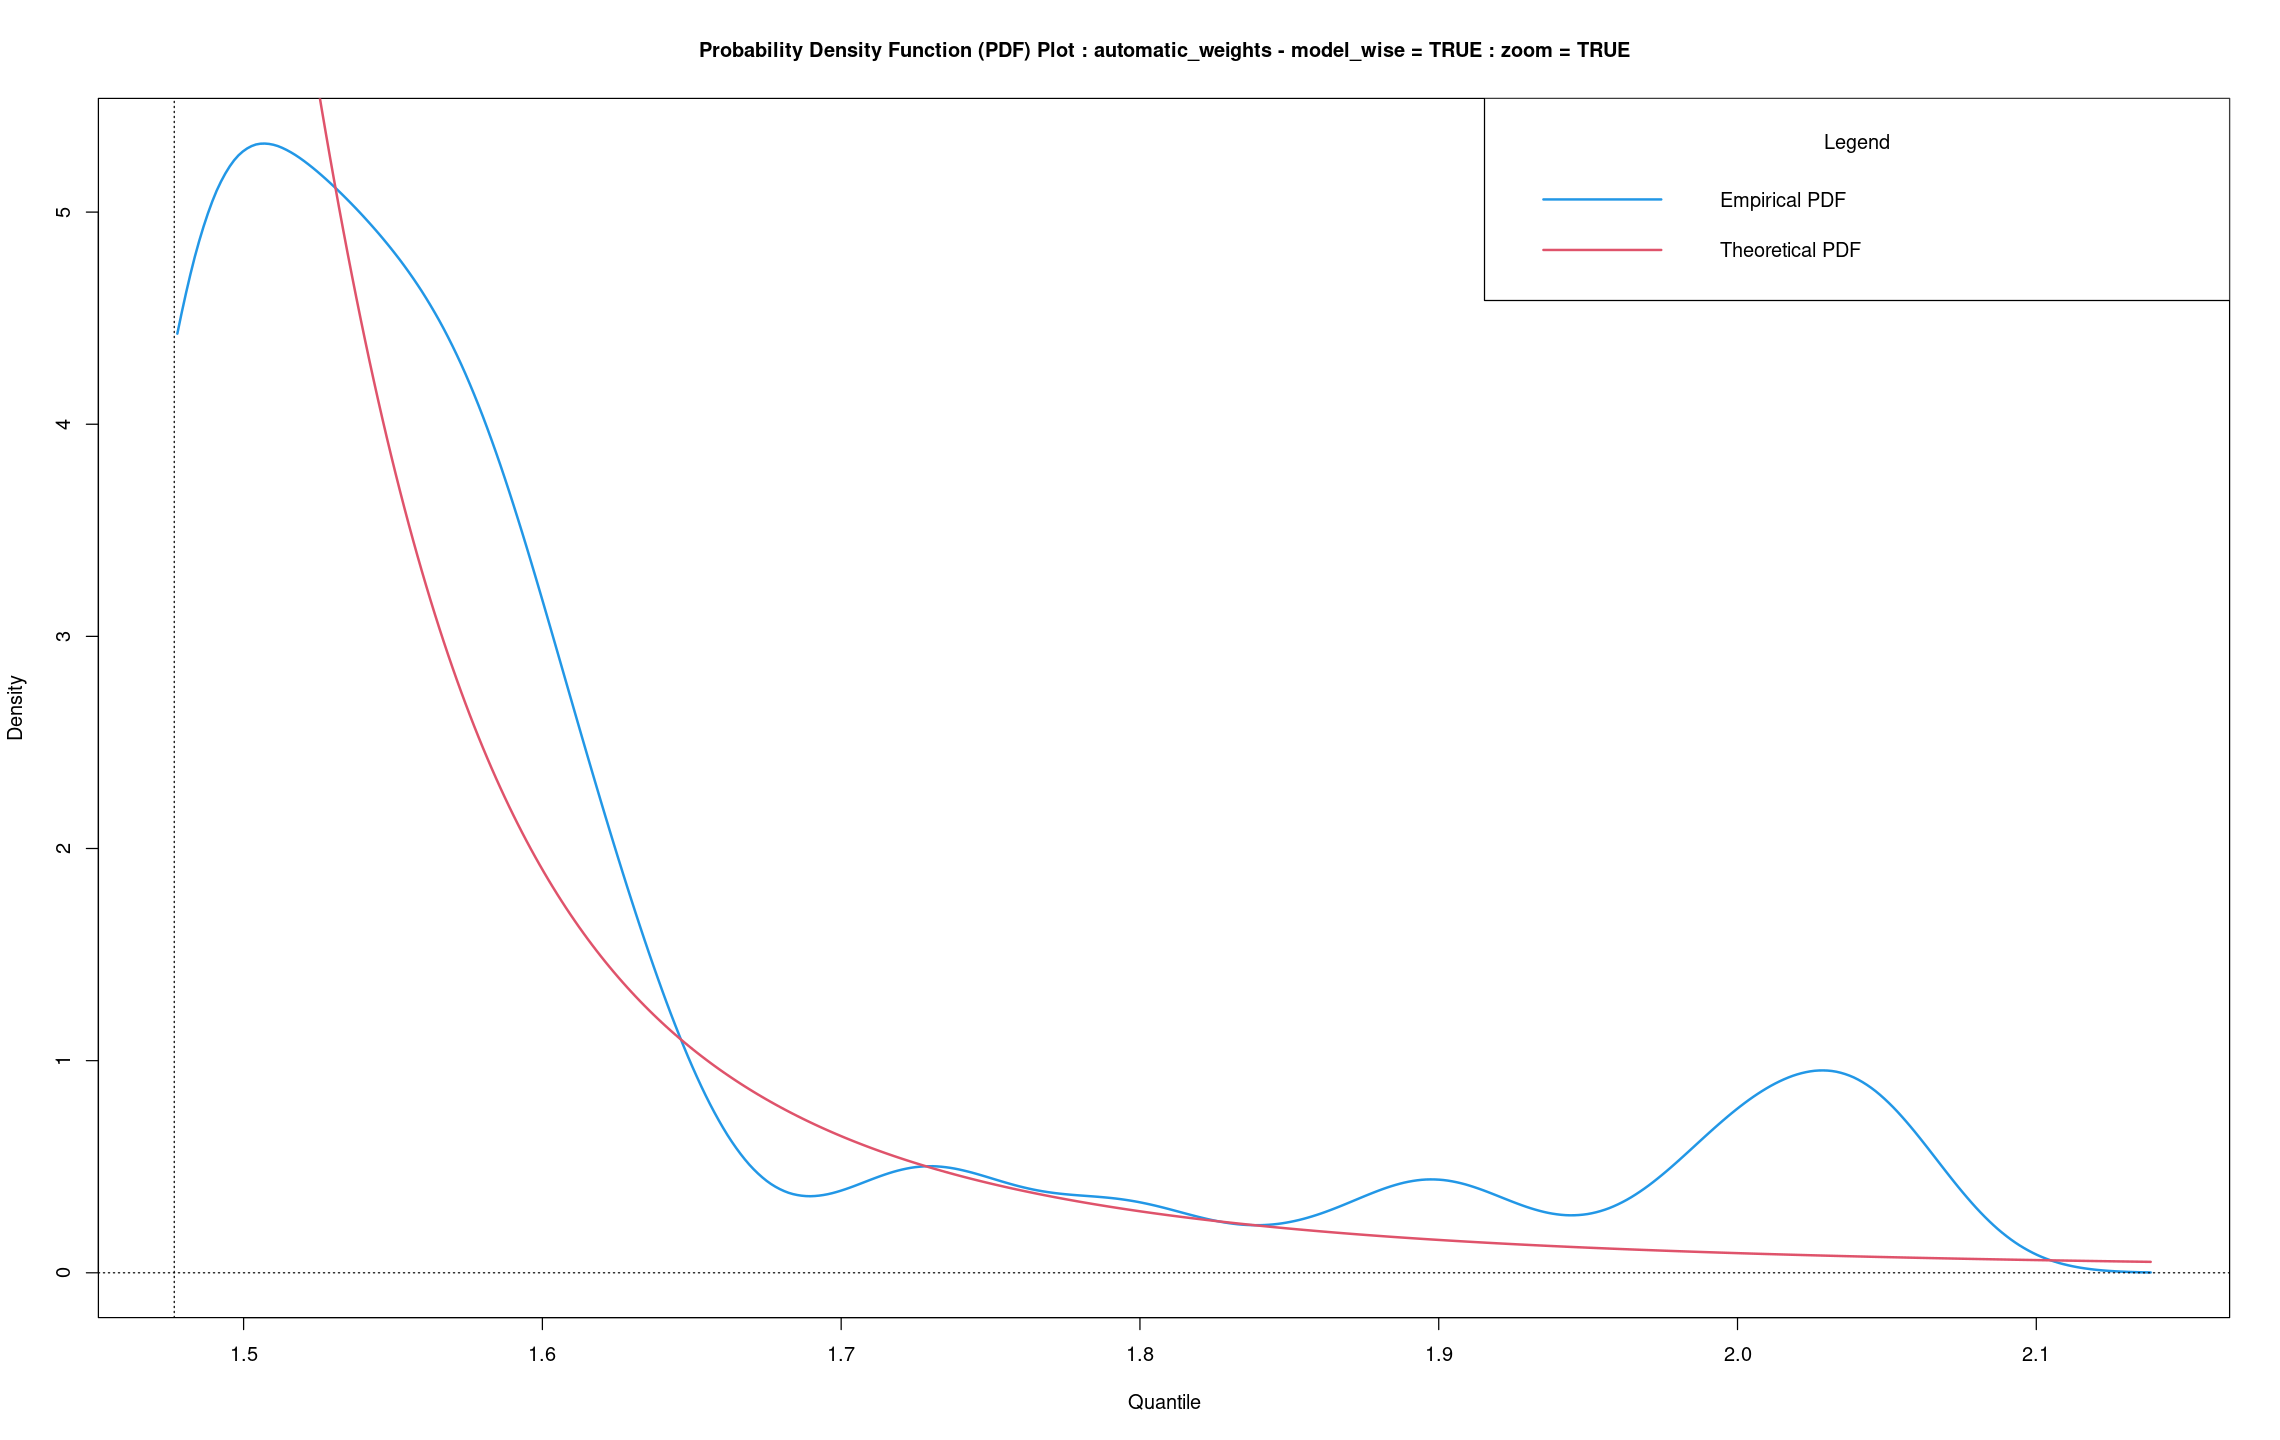

In [55]:
plot_gev_mixture_model_pdf(ns_gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Density",
                           main = "Probability Density Function (PDF) Plot")

In [221]:
plot_gev_mixture_model_cdf(ns_gev_mixture_model,
                           type = "automatic_weights",
                           model_wise = TRUE,
                           zoom = TRUE,
                           xlab = "Quantile",
                           ylab = "Cumulative Probability",
                           main = "Cumulative Distribution Function (CDF) Plot")

## Quantiles

In [222]:
estimator_types <- c("automatic_weights_mw", 
                     "pessimistic_weights_mw", 
                     "identic_weights_mw", 
                     "automatic_weights_pw",
                     "pessimistic_weights_pw", 
                     "identic_weights_pw", 
                     "model_wise",
                     "parameter_wise",
                     "empirical")

In [223]:
alpha <- 10^(-14)

In [224]:
rl_mw <- estimate_gev_mixture_model_quantile(ns_gev_mixture_model,
                                             alpha = alpha,
                                             confidence_level = 0.95,
                                             do.ci = TRUE,
                                             estimator_type = estimator_types[1])

rl_mw

[1] 2.075772232

In [225]:
est_rl_pw <- suppressWarnings(estimate_gev_mixture_model_quantile(ns_gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[8]))
est_rl_pw

lower       quantile    upper      
2 1.940561742 2.075774307 2.210986872
3 1.878134868 2.078900787 2.279666706
4 1.823455738 2.078551709 2.333647679
5 1.730590116 2.085400614 2.440211112

In [226]:
est_rl_mw <- suppressWarnings(estimate_gev_mixture_model_quantile(ns_gev_mixture_model,
                                                                  alpha = alpha,
                                                                  confidence_level = 0.95,
                                                                  do.ci = TRUE,
                                                                  estimator_type = estimator_types[7]))
est_rl_mw

lower       quantile    upper      
2 1.940561742 2.075774307 2.210986872
3 1.878134868 2.078900787 2.279666706

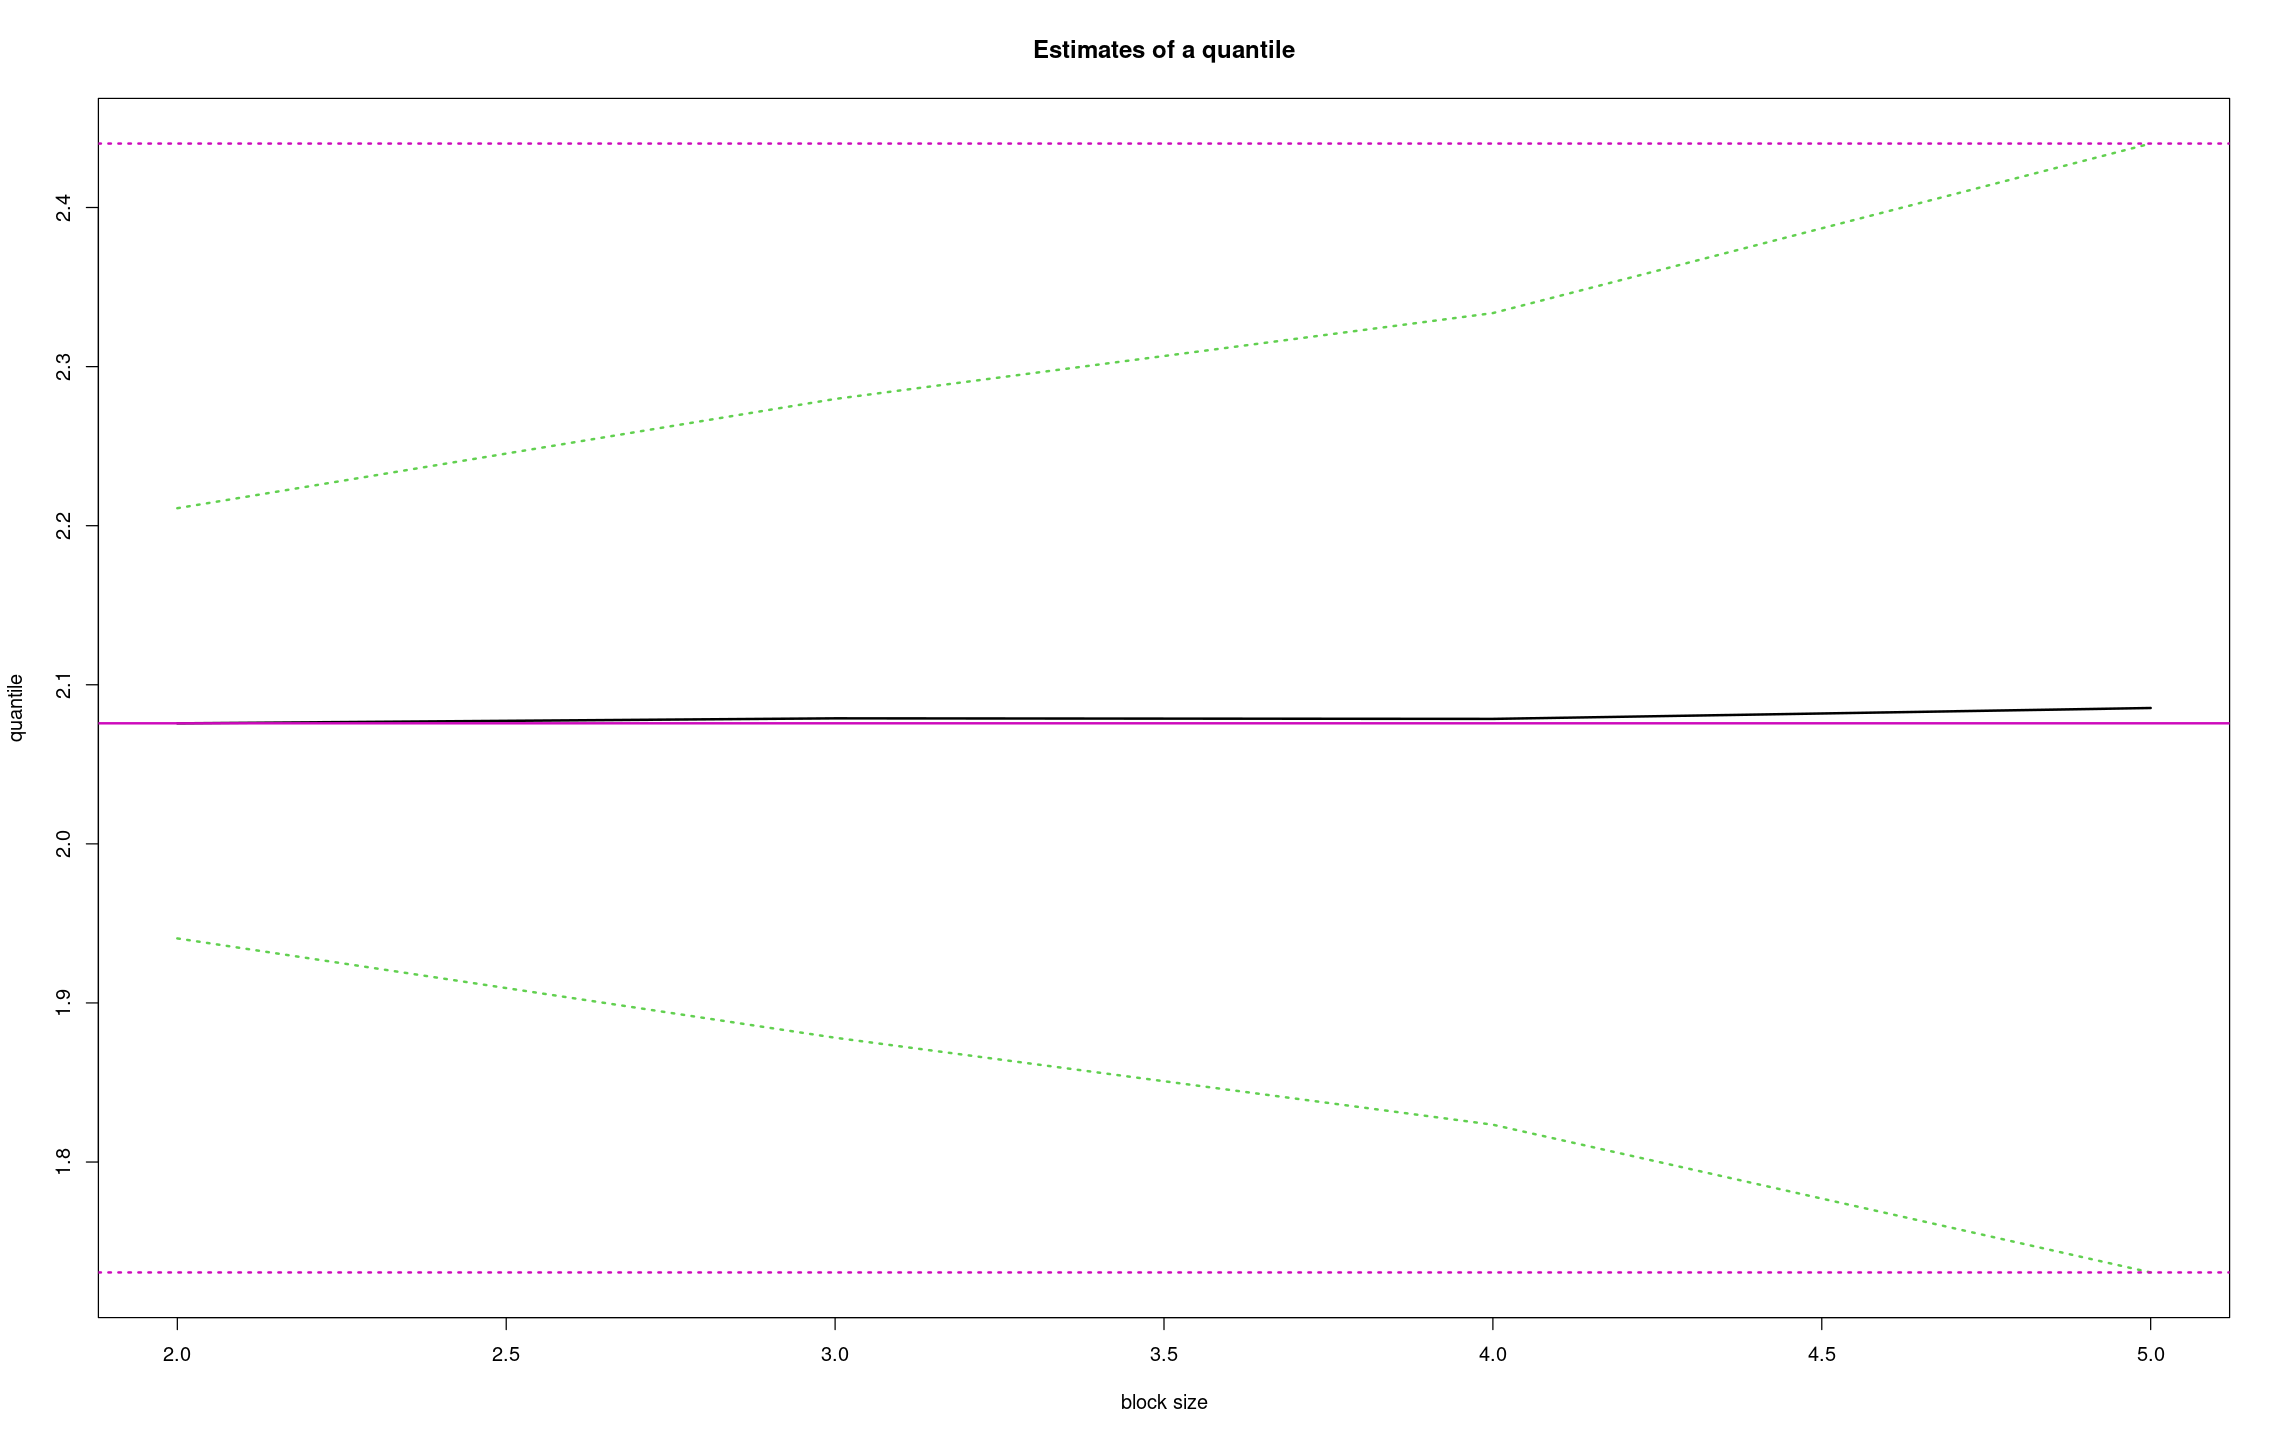

In [227]:
matplot(x = rownames(est_rl_pw), 
        y = est_rl_pw, 
        xlab = "block size",
        ylab = "quantile",
        main = "Estimates of a quantile",
        ylim = range(est_rl_pw),
        cex = 1,
        cex.lab = 1,
        cex.axis = 1,
        type = "l", 
        lty = c("dotted", "solid", "dotted"), 
        lwd = c(2,2,2), 
        col = c(3, 1, 3))

abline(h = rl_mw, col = 6, lwd = 2)
abline(h = range(est_rl_pw), col = 6, lty = "dotted", lwd = 2)